RH : Relative Humidity

Blast Disease R1 : Blast Disease severity recorded as PDI at R1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data into a Pandas DataFrame
file_path = 'Disease Incidense 1.xlsx'
df_2019 = pd.read_excel(file_path, sheet_name='2019')
df_2020 = pd.read_excel(file_path, sheet_name='2020')
df_2021 = pd.read_excel(file_path, sheet_name='2021')
df_2022 = pd.read_excel(file_path, sheet_name='2022')

In [2]:
df_2019

Month  Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0        May                 1                   7.6                 38.64   
1       June                 7                  45.2                 34.83   
2       July                 9                  57.0                 32.19   
3     August                 5                  37.9                 29.87   
4  September                14                 251.4                 29.73   
5    October                12                 160.9                 30.58   
6   November                 1                   6.1                 30.00   
7   December                 2                   6.3                 28.71   

   Temperature (ᵒC) Min  RH Morning  RH Evening  Blast Disease R1  \
0                 24.41       49.77       19.19               2.0   
1                 24.43       60.58       33.92               3.0   
2                 23.58       66.93       42.99               2.0   
3                 22.51       70.32       47.22               2.0   
4                 22.80       77.36       58.32               1.0   
5                 21.90       90.08       55.82               1.0   
6                 19.56       82.62       45.51               2.0   
7                 17.58       87.98       40.73               NaN   

   Bacterial Blight Disease R1  Brown Spot Disease R1  False Smut Disease R1  \
0                          4.0                    6.0                    0.0   
1                          6.0                    4.0                    0.0   
2                          5.0                    5.0                    0.0   
3                          5.0                    6.0                    0.0   
4                          3.0                    8.0                    8.0   
5                          4.0                    6.0                    9.0   
6                          3.0                    3.0                   13.0   
7                          NaN                    NaN                    NaN   

       DAT Date of Observation  
0   30 DAT          2019-10-17  
1   40 DAT          2019-10-27  
2   50 DAT          2019-11-06  
3   60 DAT          2019-11-16  
4   70 DAT          2019-11-26  
5   80 DAT          2019-12-06  
6   90 DAT          2019-12-16  
7  100 DAT                 NaT

In [3]:
# Select the columns for which you want to calculate the average
columns_to_average = ['RH Morning', 'RH Evening']

# Create a new column with the average of selected columns
df_2019['Average RH'] = df_2019[columns_to_average].mean(axis=1)
df_2020['Average RH'] = df_2020[columns_to_average].mean(axis=1)
df_2021['Average RH'] = df_2021[columns_to_average].mean(axis=1)
df_2022['Average RH'] = df_2022[columns_to_average].mean(axis=1)


In [4]:
# Select the columns to drop
columns_to_drop = ['RH Morning', 'RH Evening', 'Date of Observation']

# Drop the selected columns
df_2019 = df_2019.drop(columns=columns_to_drop)
df_2020 = df_2020.drop(columns=columns_to_drop)
df_2021 = df_2021.drop(columns=columns_to_drop)
df_2022 = df_2022.drop(columns=columns_to_drop)

In [5]:
df_2019 = df_2019.drop(7)
df_2020 = df_2020.drop(7)
df_2021 = df_2021.drop(7)

In [6]:
# Convert 'DAT' column to integers
df_2019['DAT'] = df_2019['DAT'].str.replace(' DAT', '').astype(int)
df_2020['DAT'] = df_2020['DAT'].str.replace(' DAT', '').astype(int)
df_2021['DAT'] = df_2021['DAT'].str.replace(' DAT', '').astype(int)
df_2022['DAT'] = df_2022['DAT'].str.replace(' DAT', '').astype(int)

#### Data Analysis For 2019

Text(0.5, 1.0, 'correlation of feature')

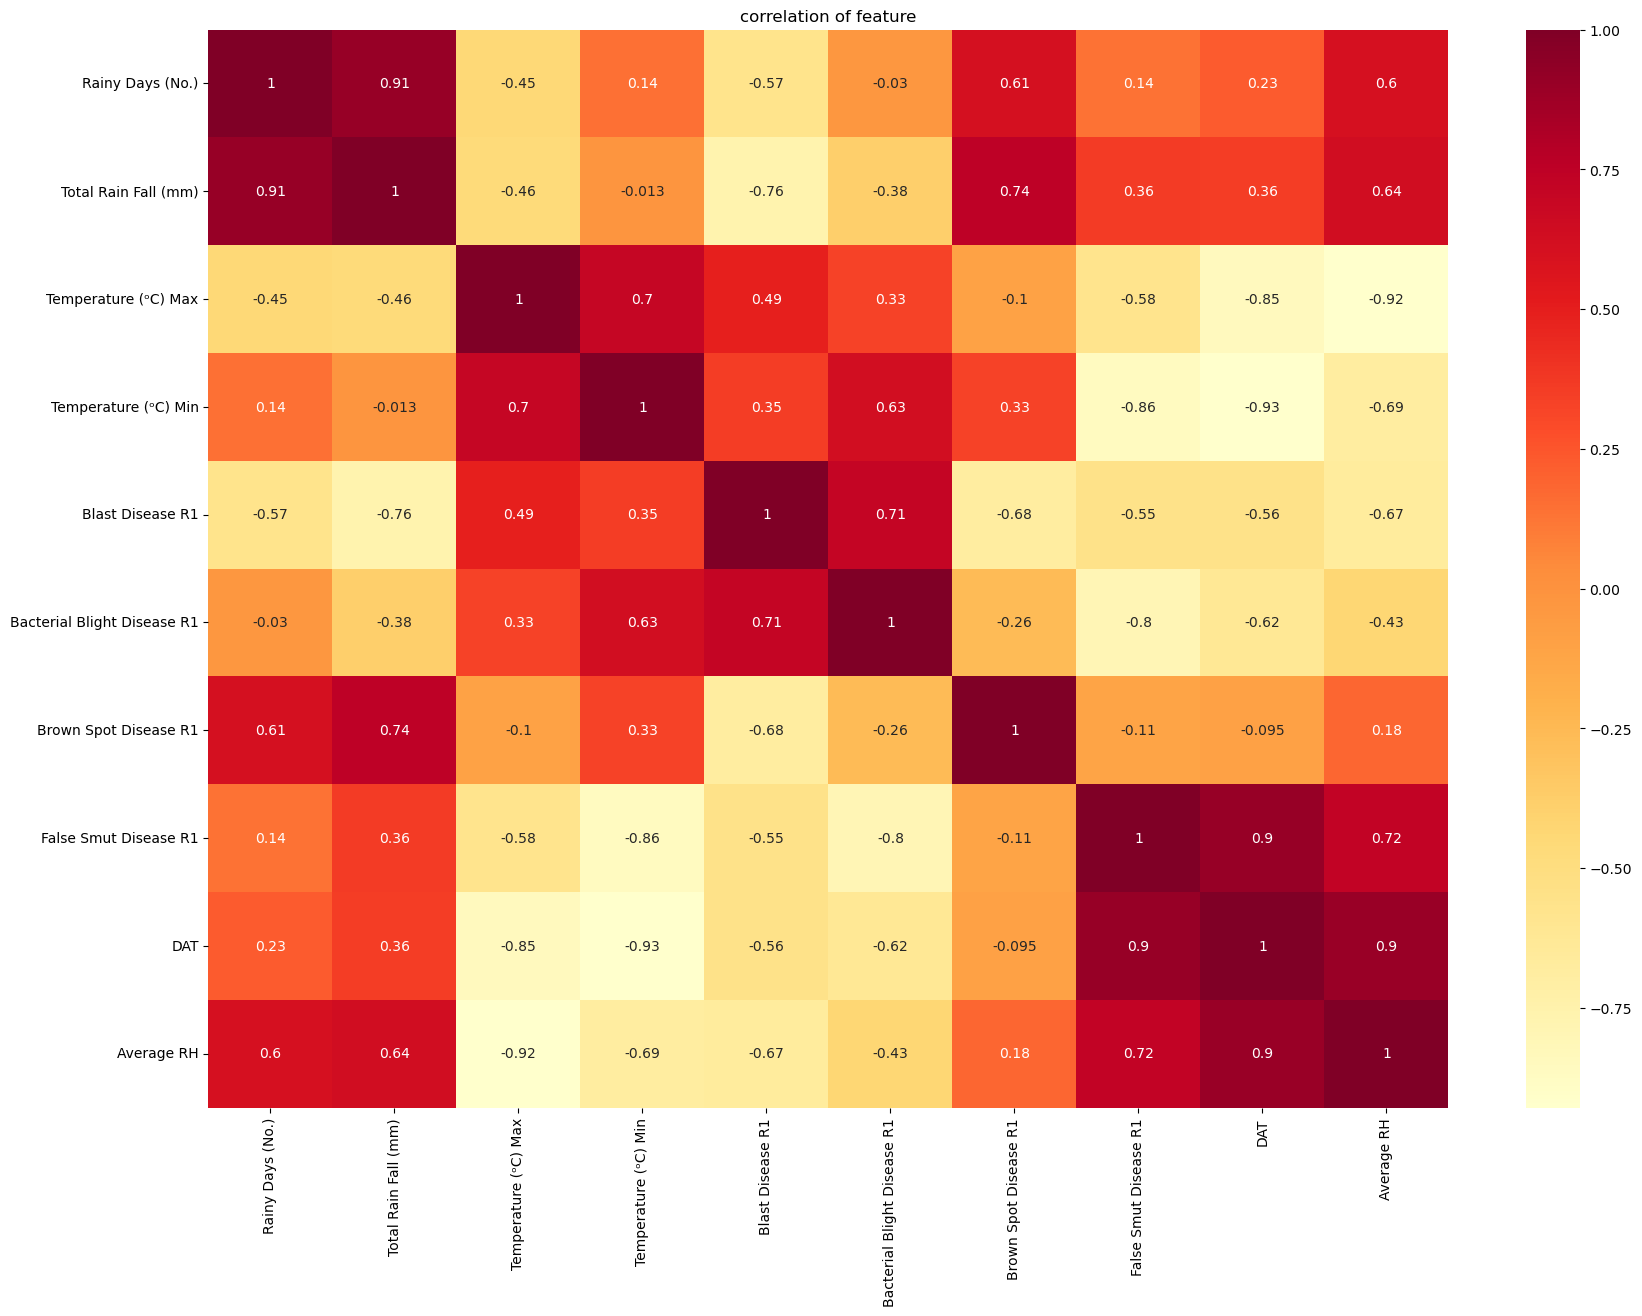

In [7]:
# Heatmap of correlation
plt.figure(figsize = (20,14))
sns.heatmap(df_2019.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

### Correlation heatmap  relation between columns:

( Rainy days & Total Rain), (Total Rain & RH), (Total Rain & Brown Spot Disease ), (Total Rain & Blast Disease),
(Avg RH & False Smut Disease)
are very highly correleted with each other => Positive relation

(Avg RH & Temp Max), (Avg RH & Blast Disease), (Avg RH & Bacterial Disease), (Temp Max, Min & False Smut Disease) 
are highly correleted with each other => Negative relation

Biggest correlations:
Avg RH +  False Smut Disease: 0.72

Total Rain + Brown Spot Disease: 0.74


Avg RH + Temp max : -0.91

Avg RH + Blast Disease : -0.67

In [8]:
# Comparing Blast Disease R1 vs parameter

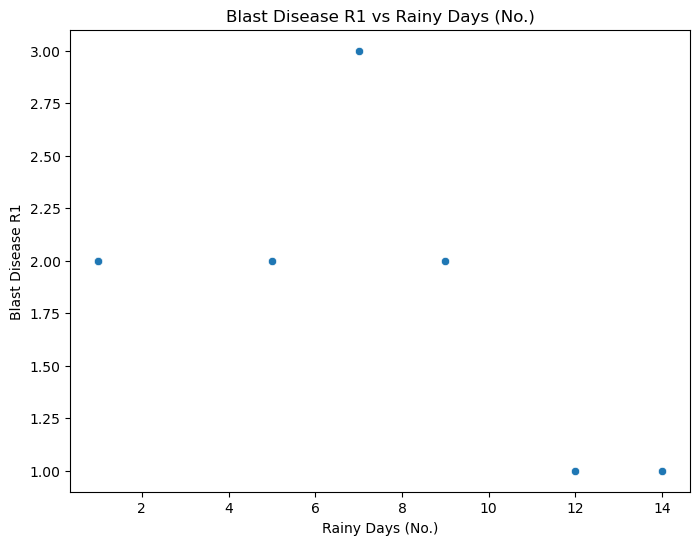

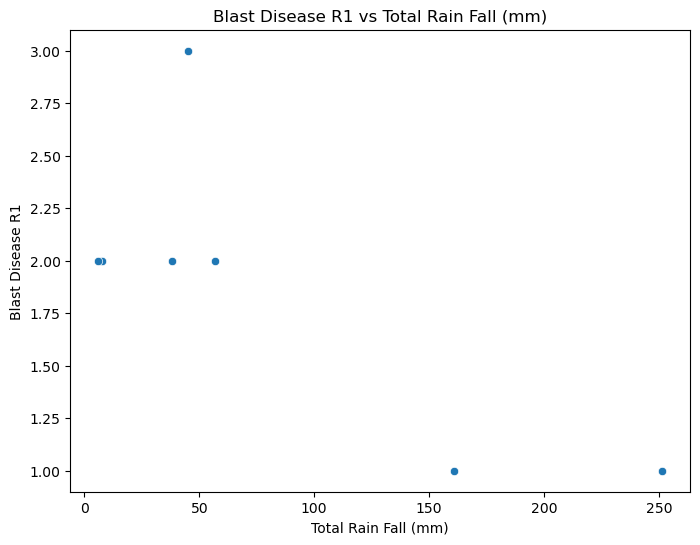

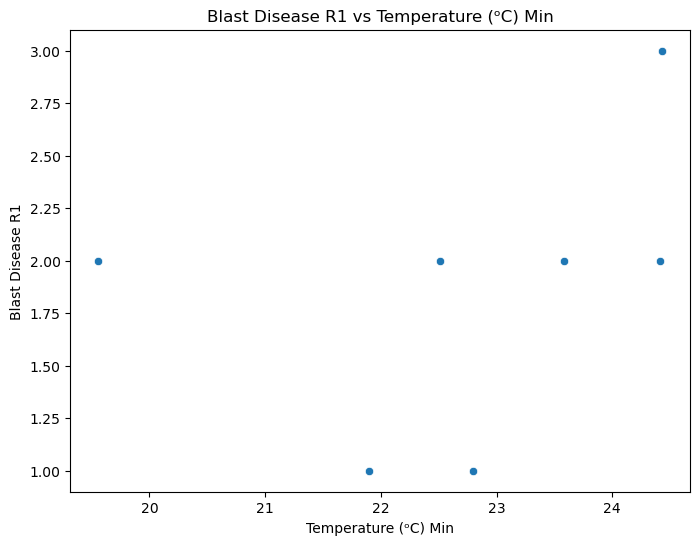

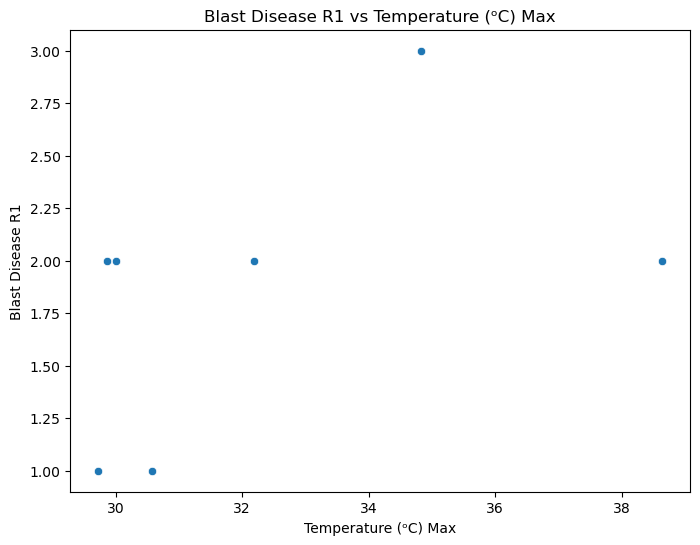

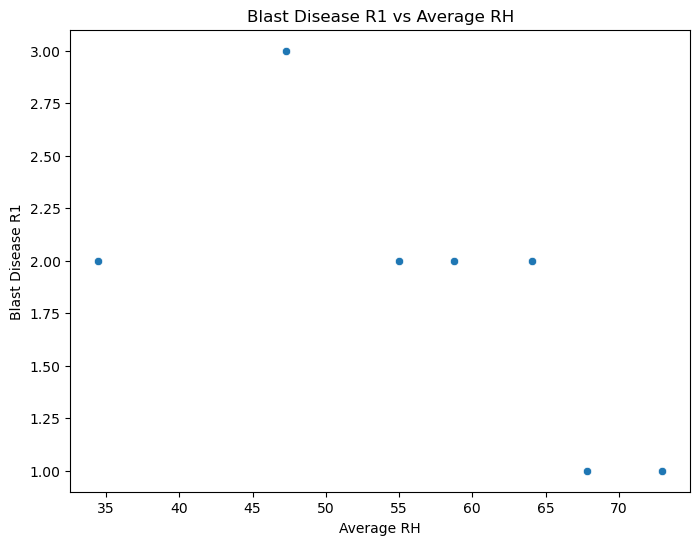

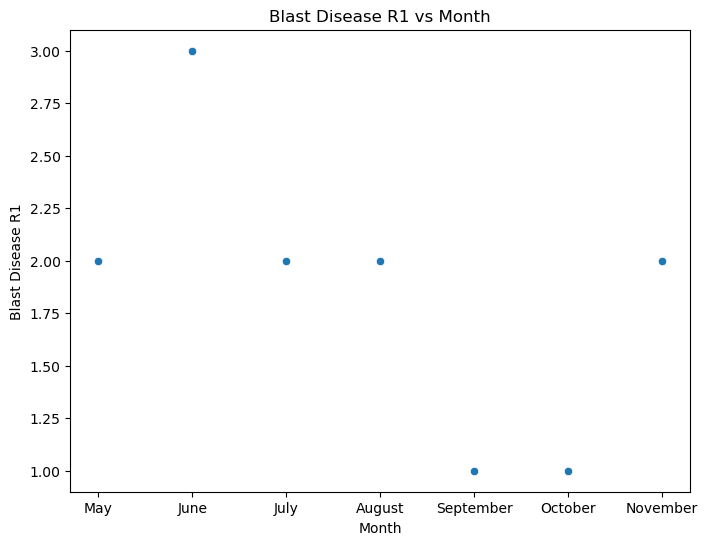

In [9]:
# Select one disease for analysis
disease_column = 'Blast Disease R1'

# Select parameters for bivariate analysis
parameters = ['Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Min', 'Temperature (ᵒC) Max', 'Average RH', 'Month']

# Plot scatter plots for each parameter against the selected disease
for parameter in parameters:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_2019[parameter], y=df_2019[disease_column])
    plt.title(f'{disease_column} vs {parameter}')
    plt.xlabel(parameter)
    plt.ylabel(disease_column)
    plt.show()

In [10]:
# Now comparing for each variable with each disease 

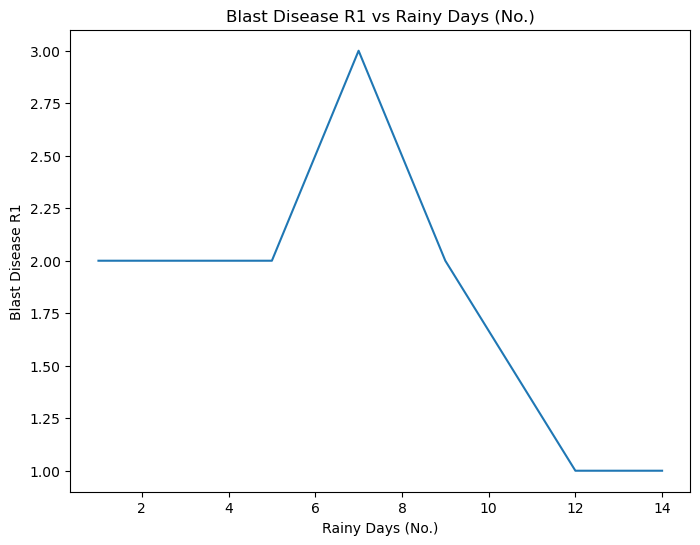

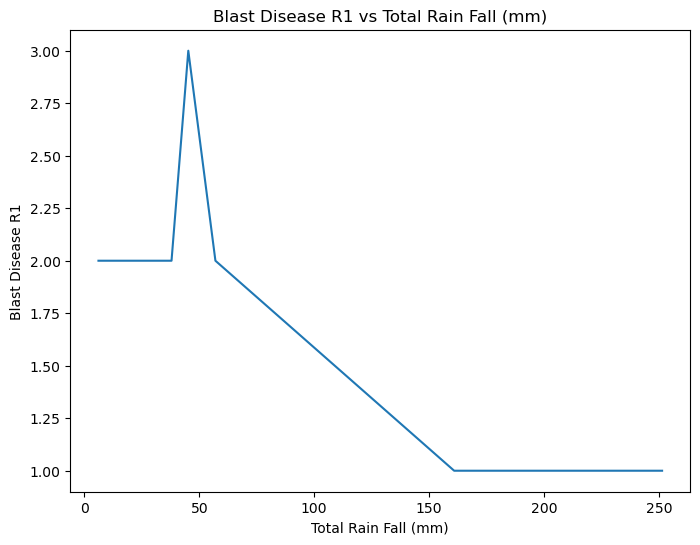

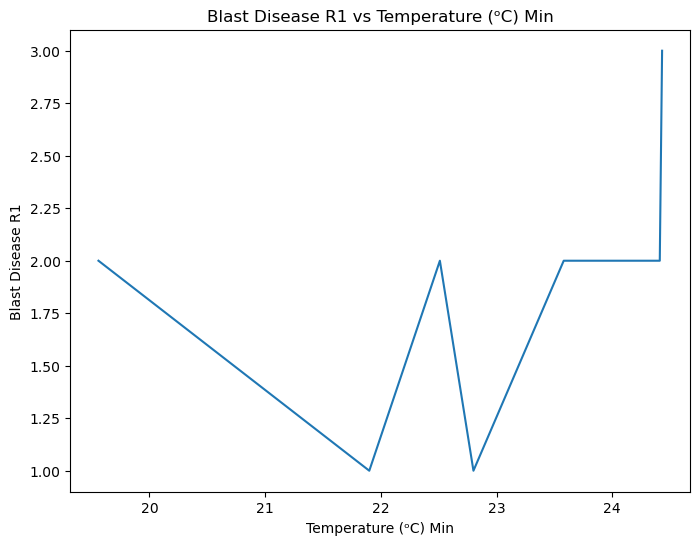

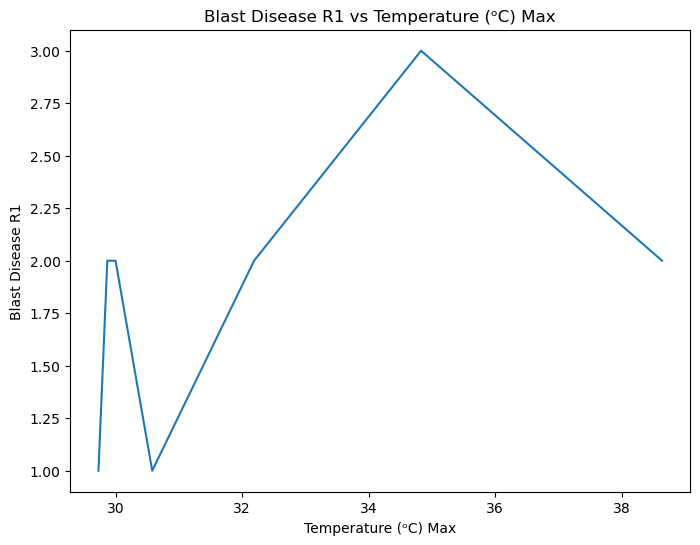

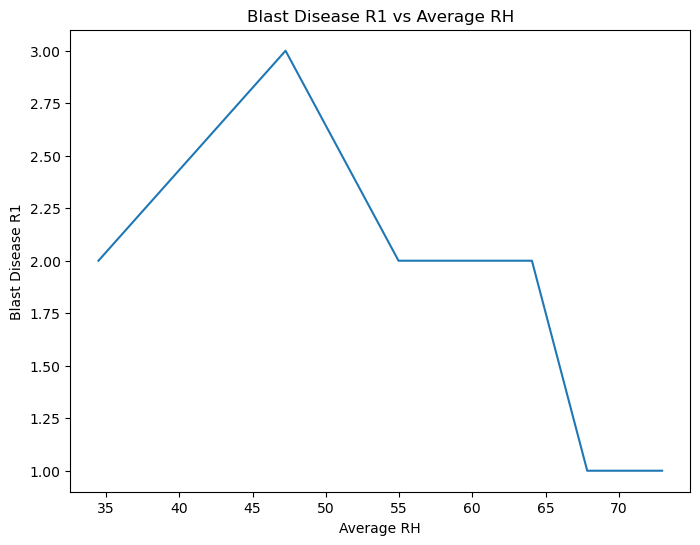

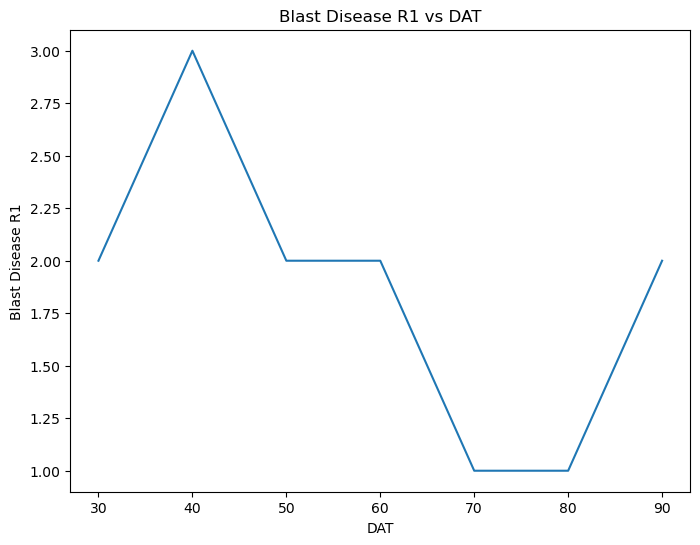

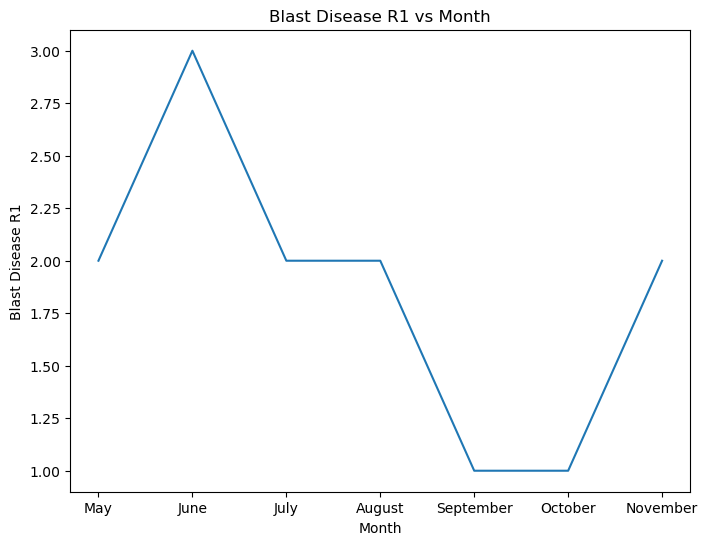

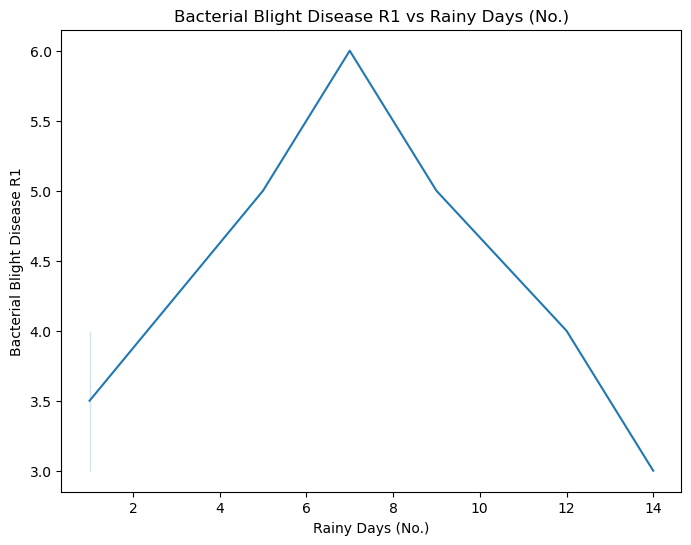

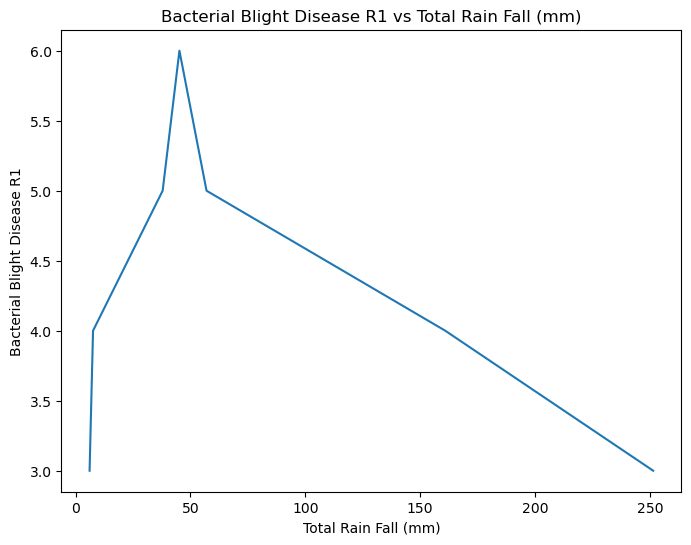

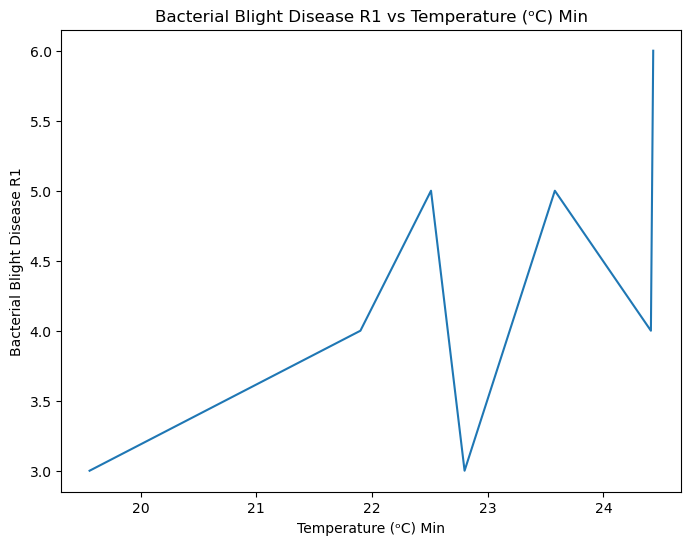

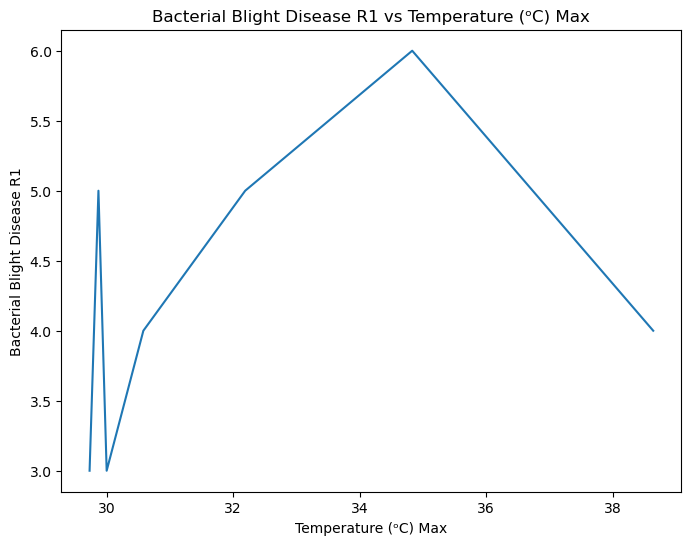

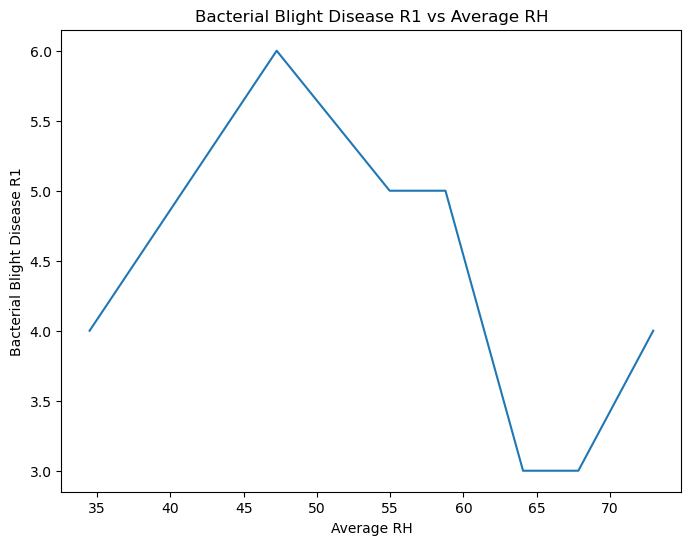

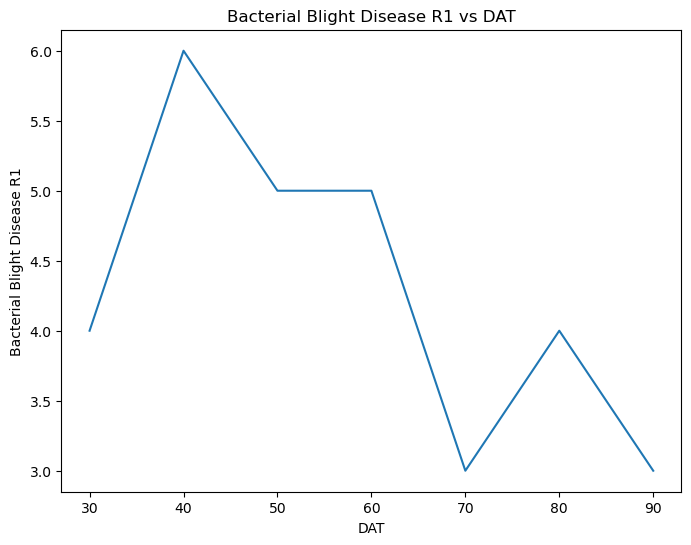

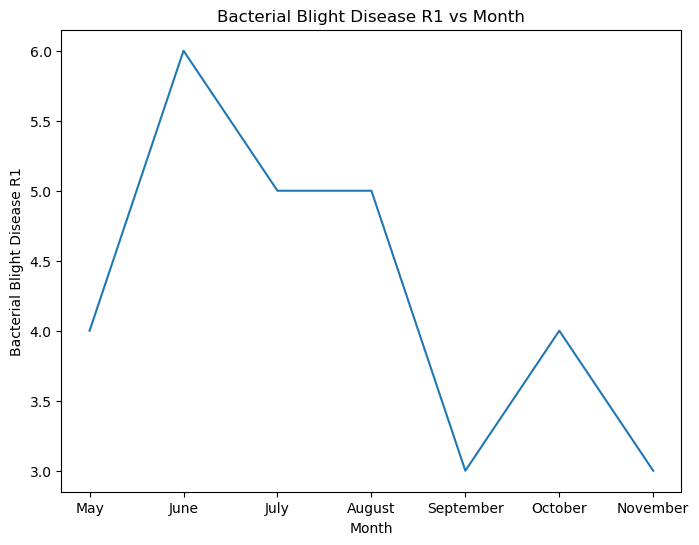

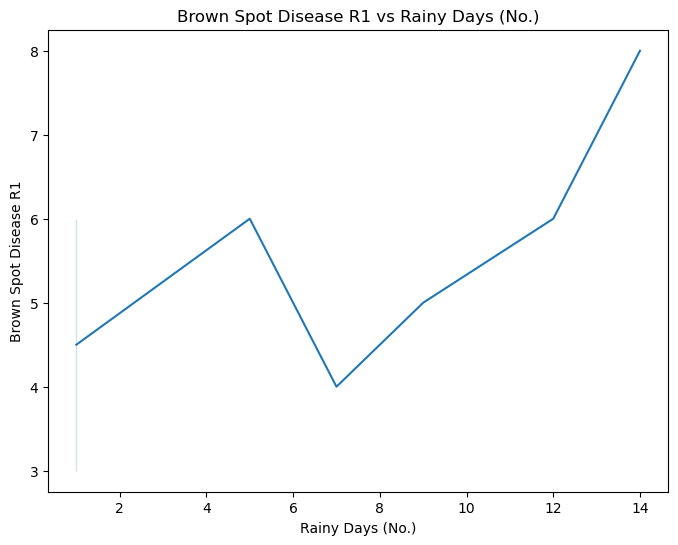

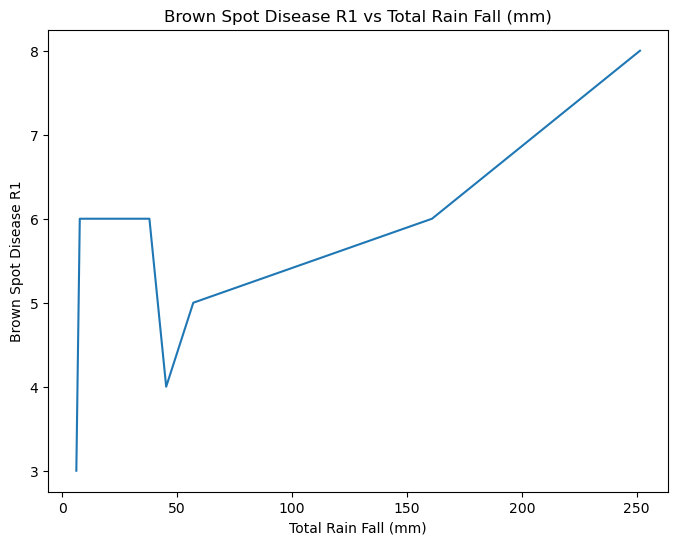

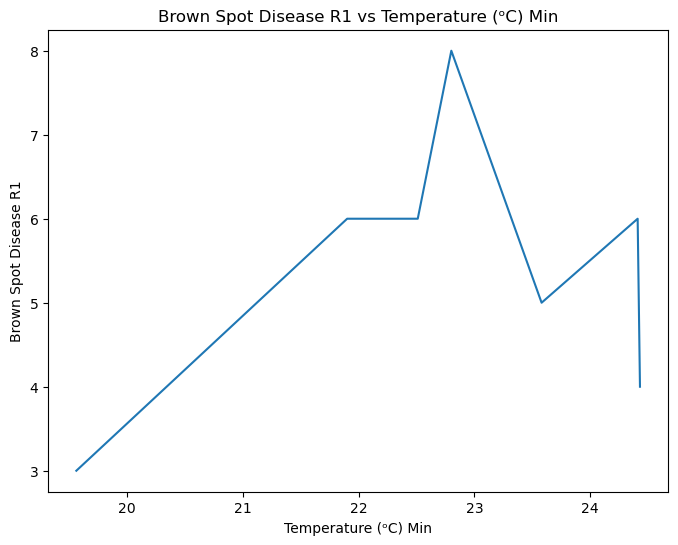

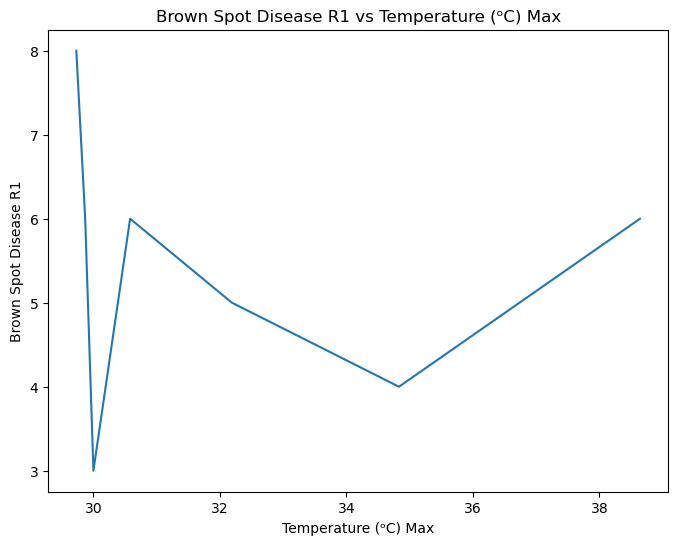

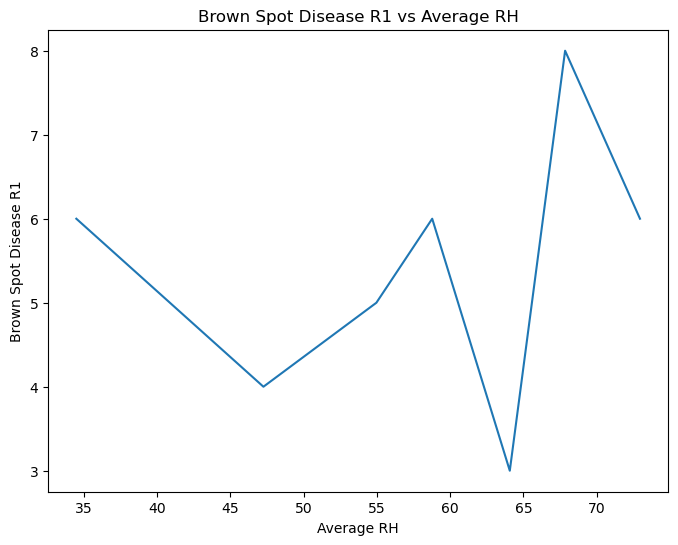

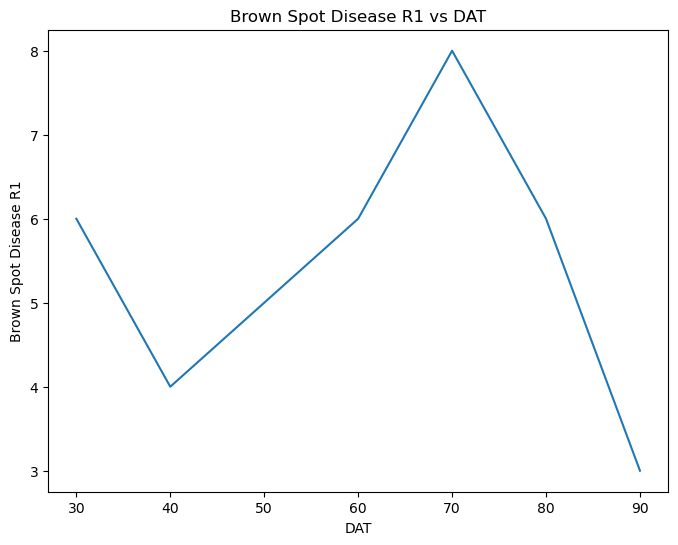

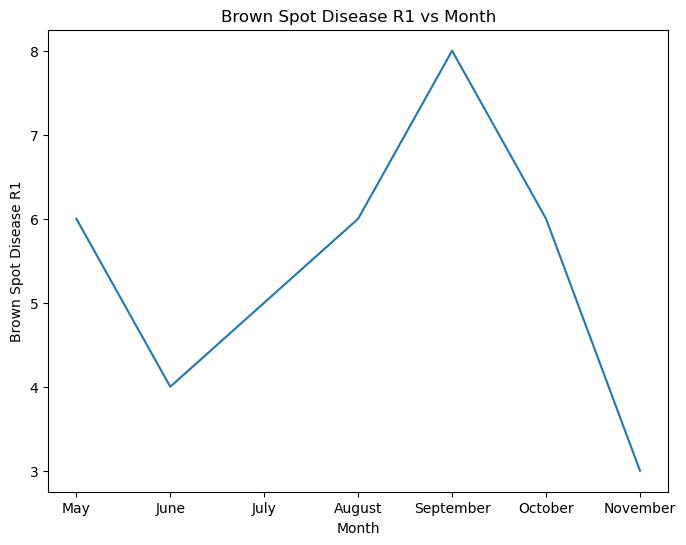

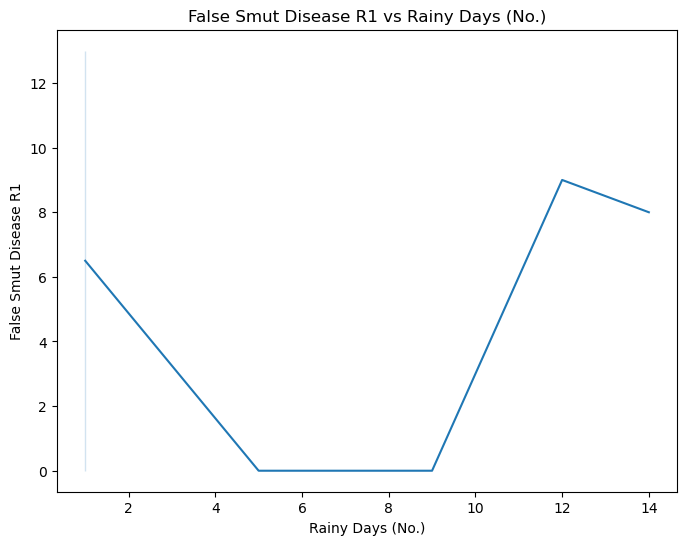

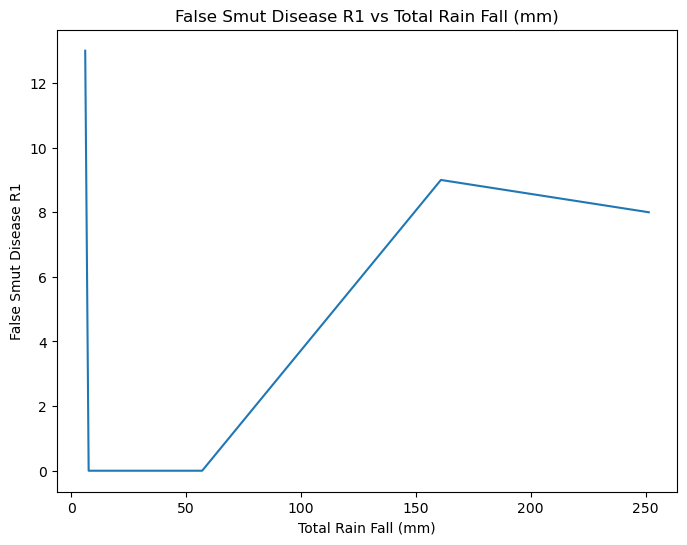

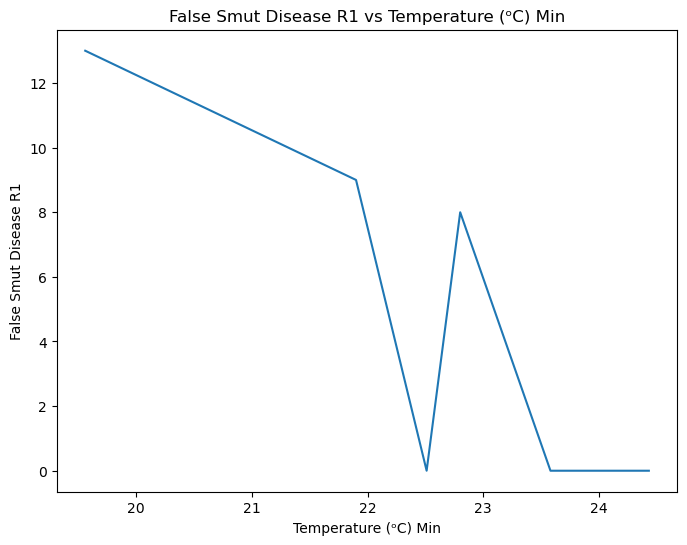

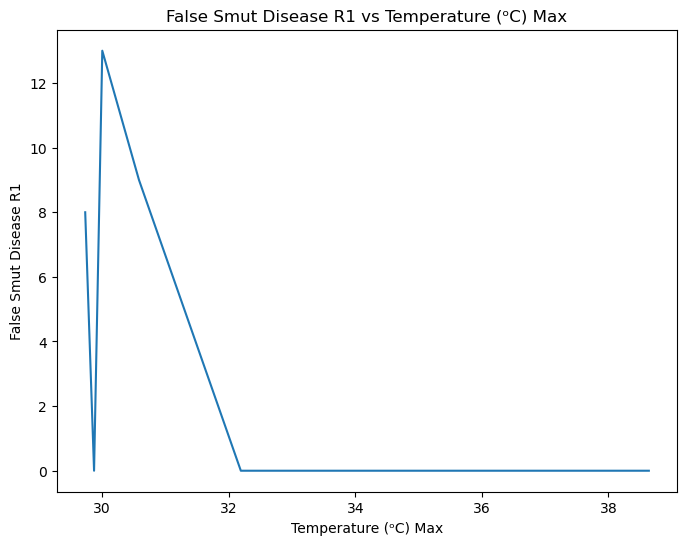

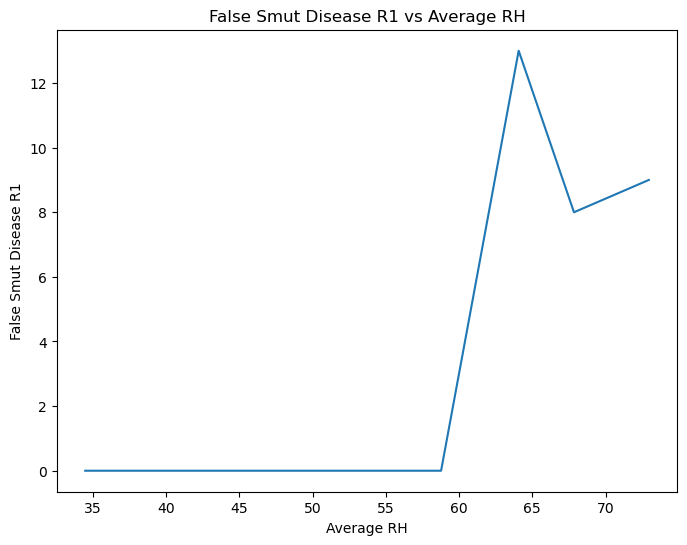

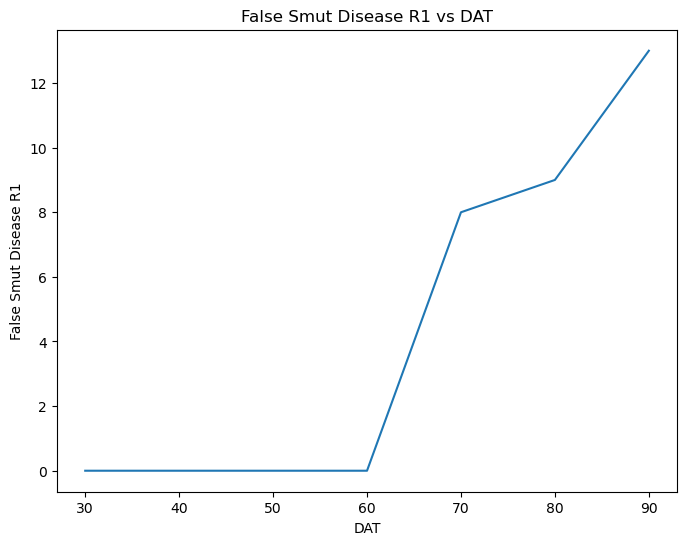

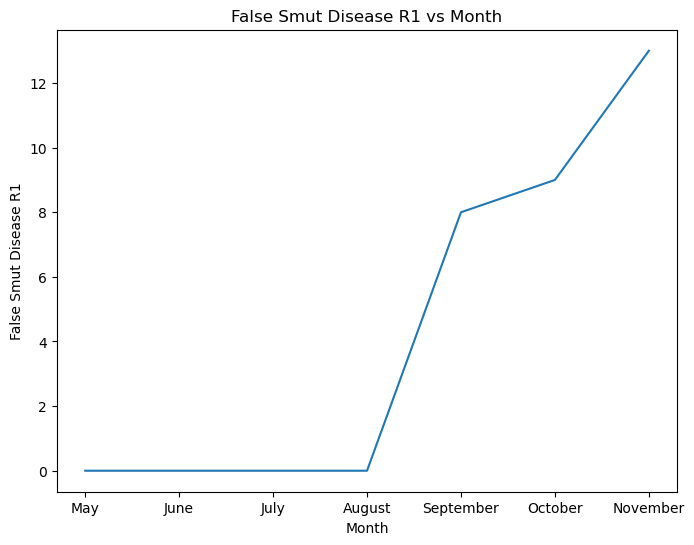

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of disease columns
disease_columns = ['Blast Disease R1', 'Bacterial Blight Disease R1', 'Brown Spot Disease R1', 'False Smut Disease R1']

# Select parameters for bivariate analysis
parameters = ['Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Min', 'Temperature (ᵒC) Max', 'Average RH', 'DAT' , 'Month']

# Loop through diseases and parameters to create line charts
for disease_column in disease_columns:
    for parameter in parameters:
        plt.figure(figsize=(8, 6))
        
        # If the column name has spaces, use .loc
        sns.lineplot(x=df_2019[parameter], y=df_2019.loc[:, disease_column])
        
        plt.title(f'{disease_column} vs {parameter}')
        plt.xlabel(parameter)
        plt.ylabel(disease_column)
        plt.show()


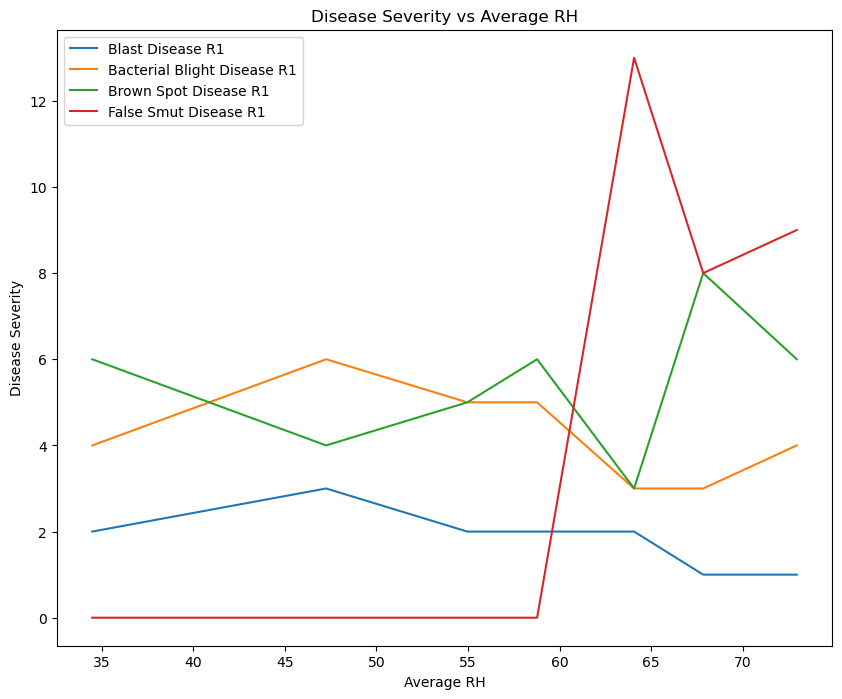

In [12]:

# List of disease columns
disease_columns = ['Blast Disease R1', 'Bacterial Blight Disease R1', 'Brown Spot Disease R1', 'False Smut Disease R1']

# Select parameter for x-axis (RH)
x_parameter = 'Average RH'

# Plot line chart with multiple lines for each disease
plt.figure(figsize=(10, 8))

for disease_column in disease_columns:
    sns.lineplot(x=df_2019[x_parameter], y=df_2019[disease_column], label=disease_column)

plt.title(f'Disease Severity vs {x_parameter}')
plt.xlabel(x_parameter)
plt.ylabel('Disease Severity')
plt.legend()
plt.show()


### Analysis For 2019


### Brown Spot Disease severity  recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Increases/ Nuetral
      3. Avg RH - Increases
      4. DAT - Neutral 
   ######  Rainfall and RH causes Brown Disease Spot more , DAT and Temp is neutral factor
    
    
### False Smut Disease severity recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Increases
   ######  Rainfall and RH and DAT causes False Smut Disease more, temp doesn't affect
   
   
### Blast Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Decreases
      2. Temp Min & Max - Increases
      3. Avg RH - Decreases
      4. DAT - Decreases
   ######  High temp causes Blast Disease more, other doesn't affect
 
 
### Bacterial Blight Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Decreases
      2. Temp Min & Max - Increases
      3. Avg RH - Decreases
      4. DAT - Decreases
   ######  High temp causes Bacterial Blight Disease more, other doesn't affect

#### Data Analysis for 2020

Text(0.5, 1.0, 'correlation of feature')

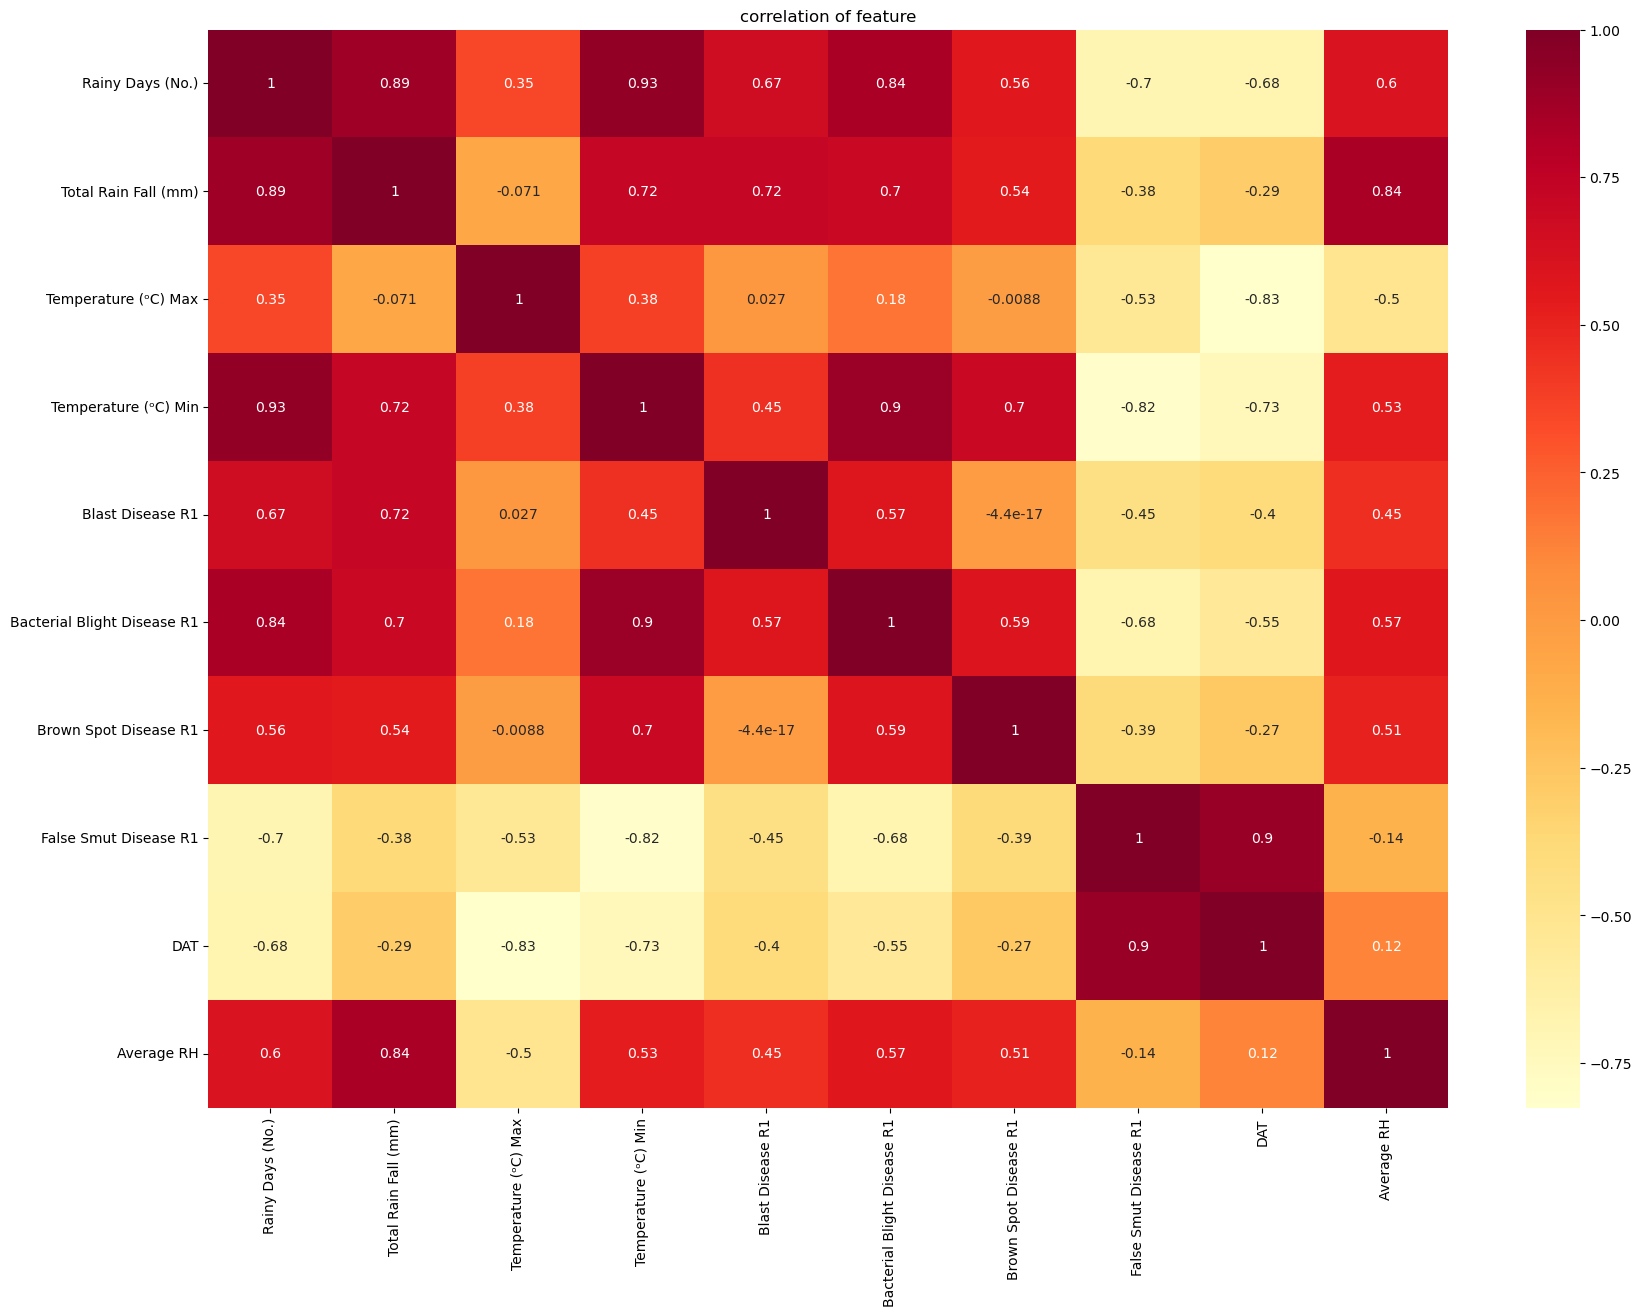

In [13]:
# Using heatmap to understand correlation better in dataset data
# Heatmap of correlation

plt.figure(figsize = (20,14))
sns.heatmap(df_2020.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

### Correlation heatmap  relation between columns:


Biggest correlations:

Bacterial Disease + Temp min : 0.9

Avg RH & Bacterial Disease : 0.57

Total Rain + Blast Disease & Bacterial Disease: 0.74


False smut + Temp min : -0.82

False smut + Rainy days : -0.67

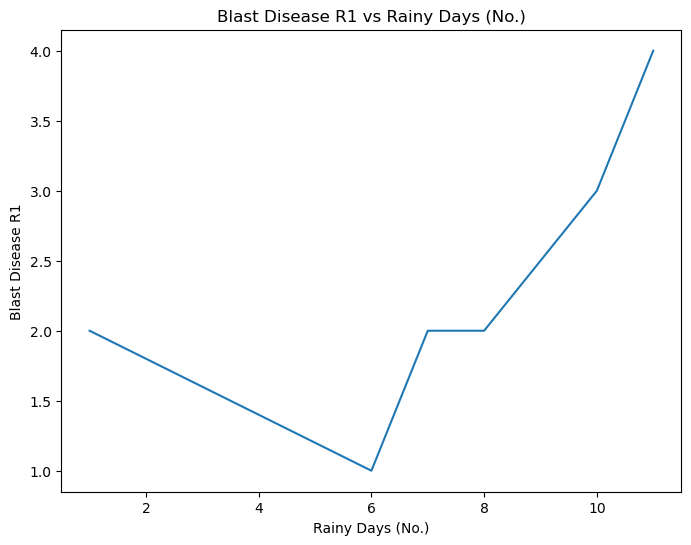

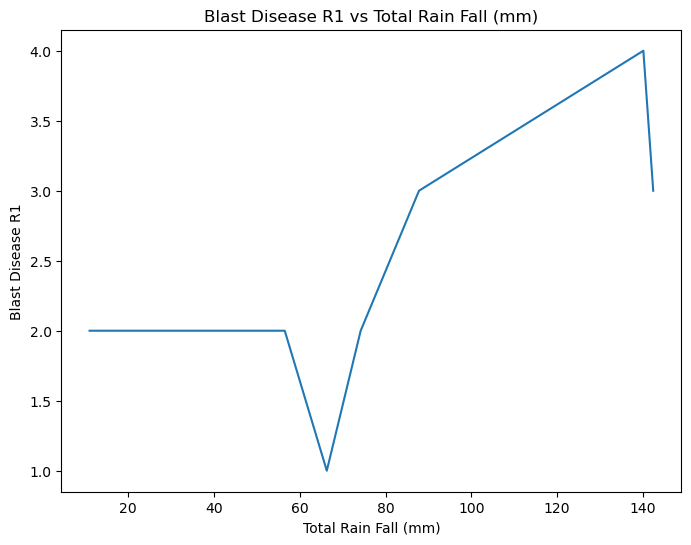

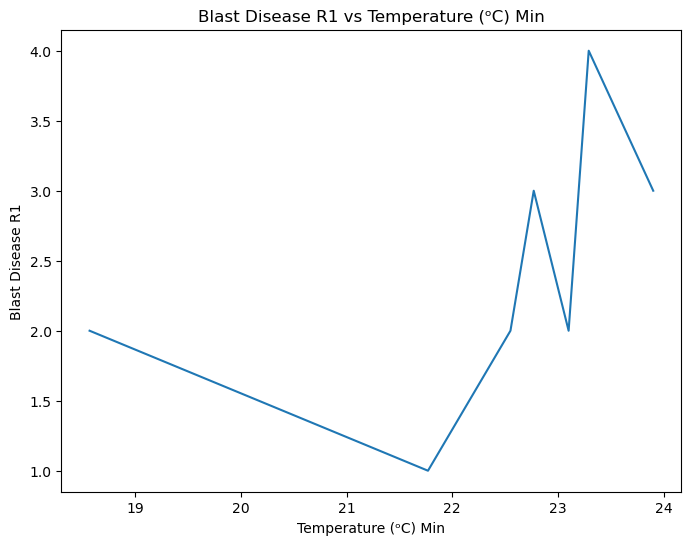

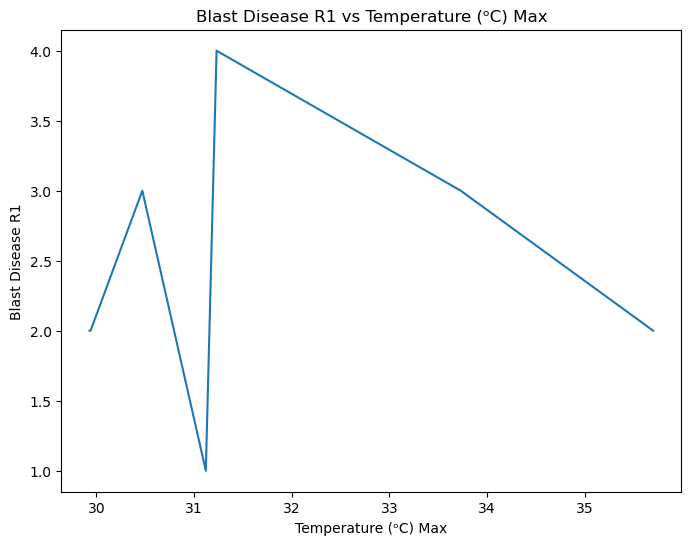

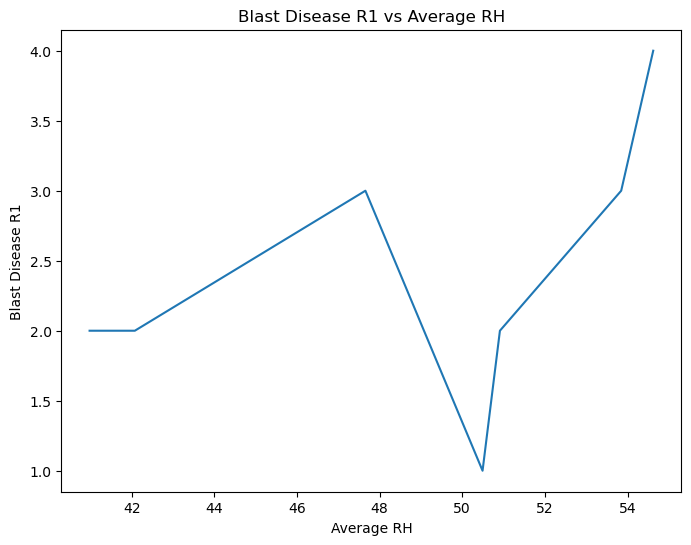

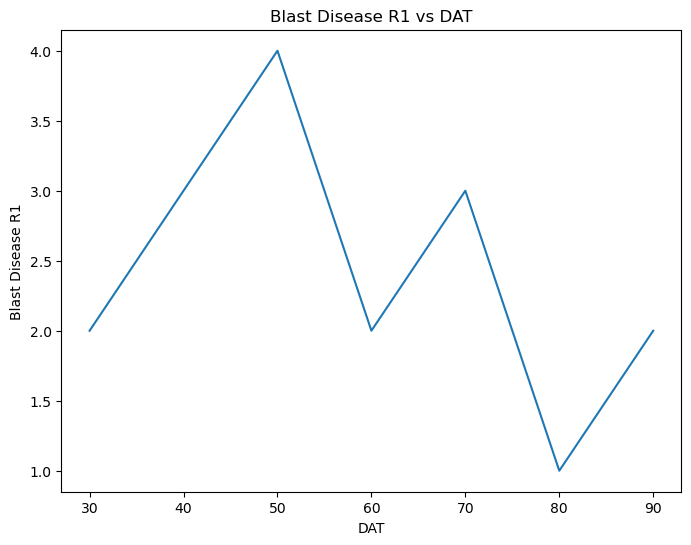

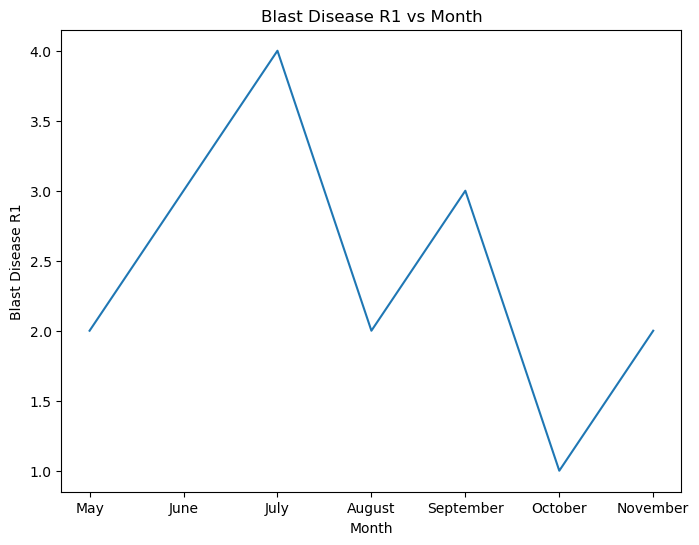

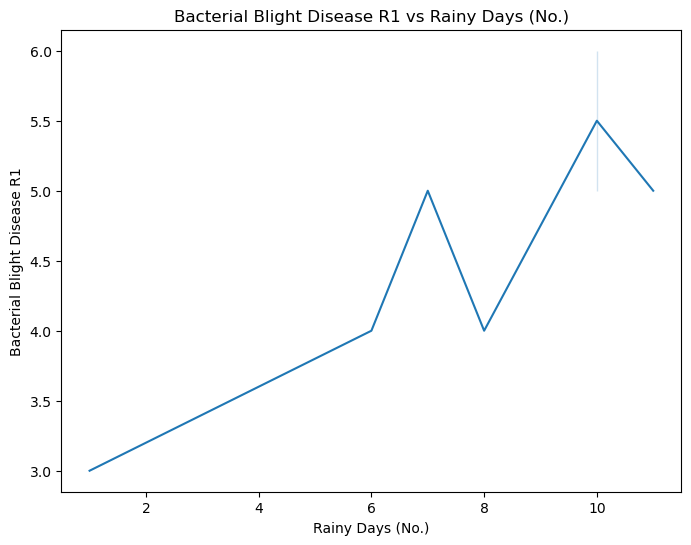

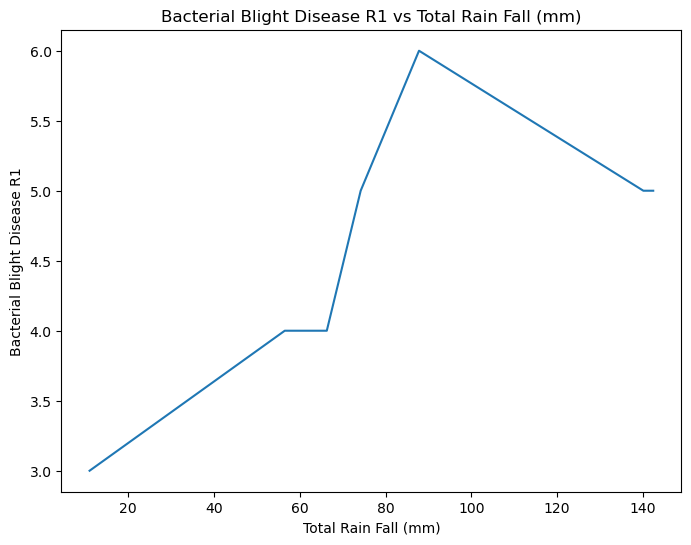

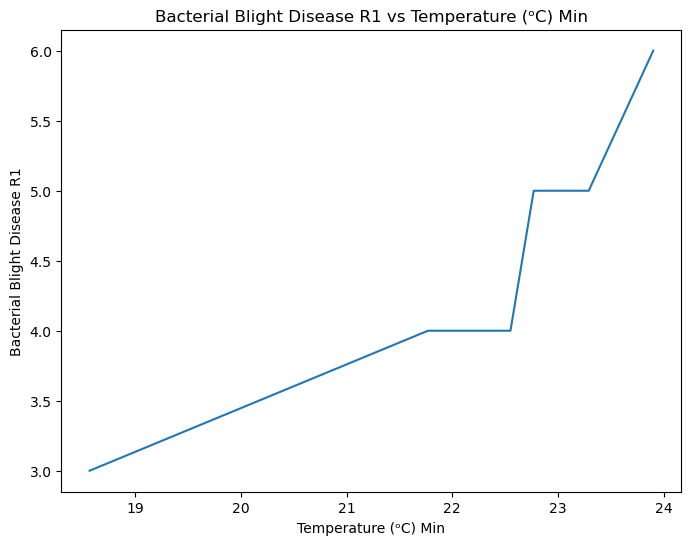

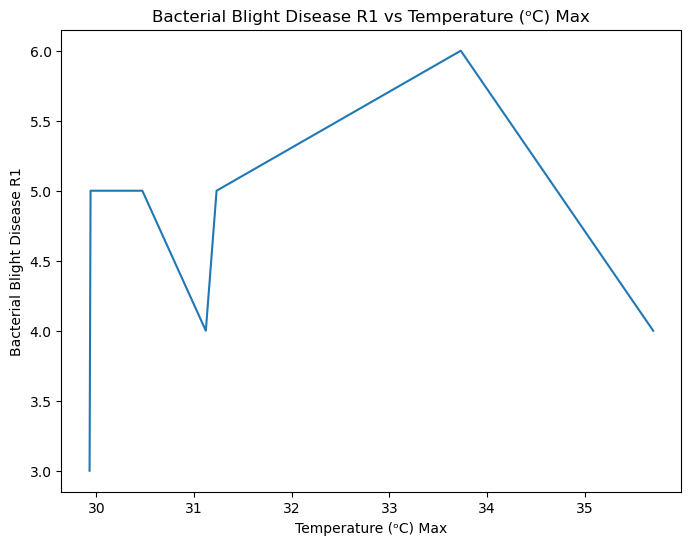

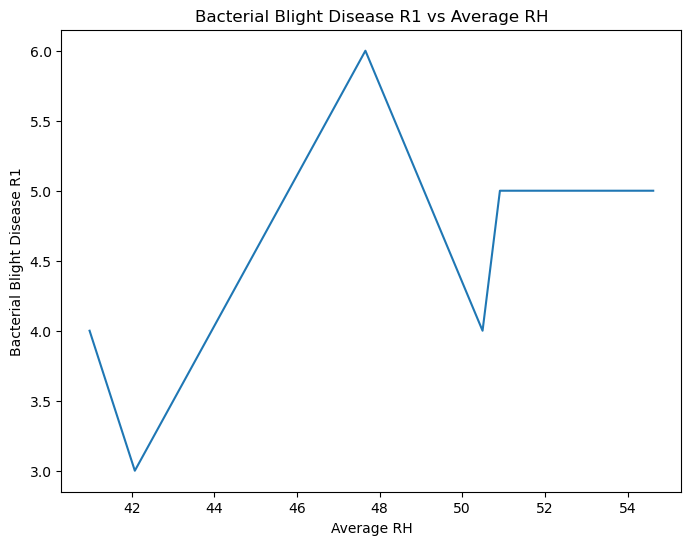

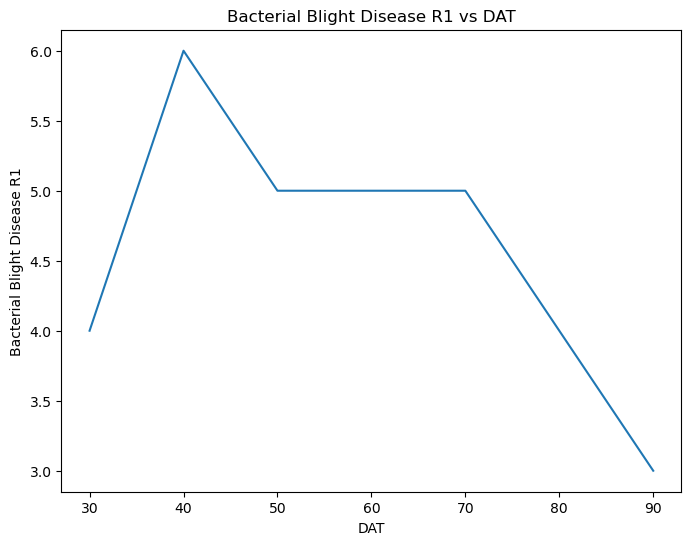

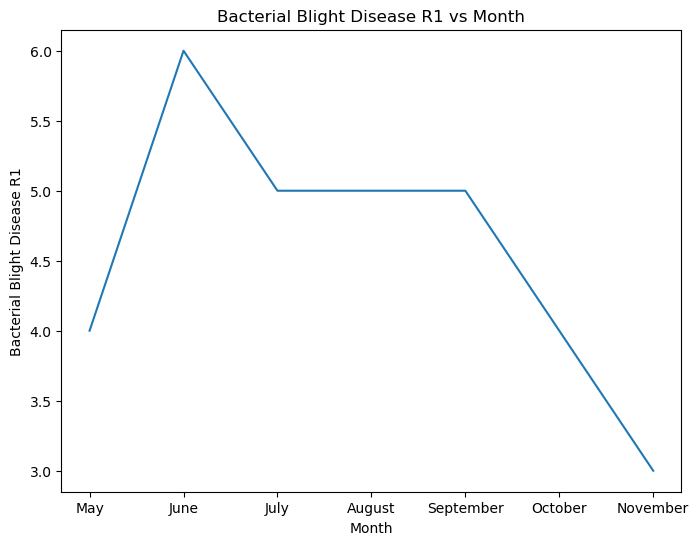

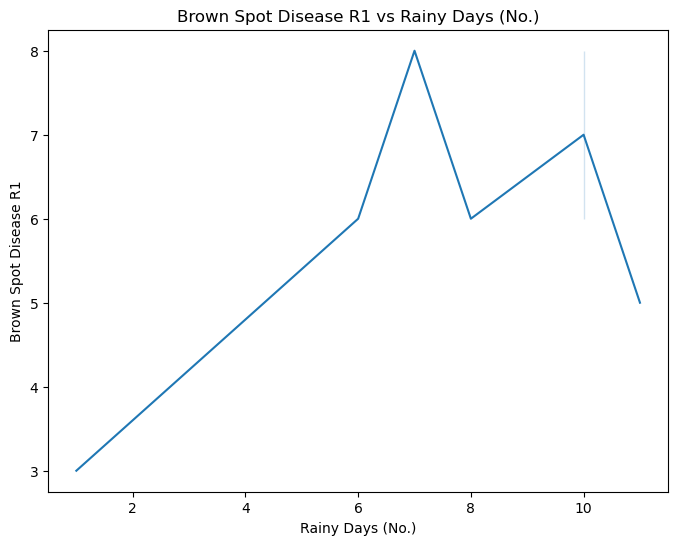

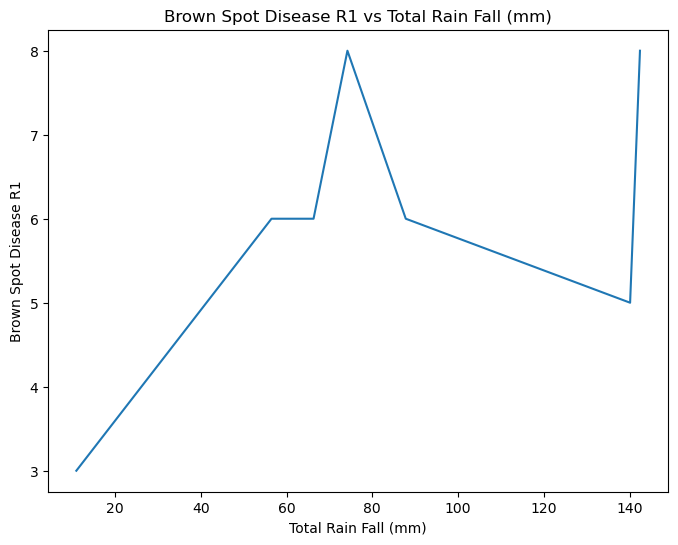

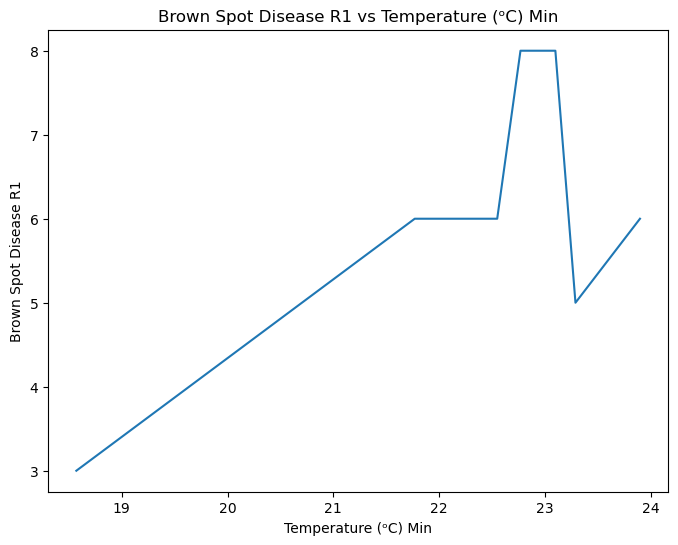

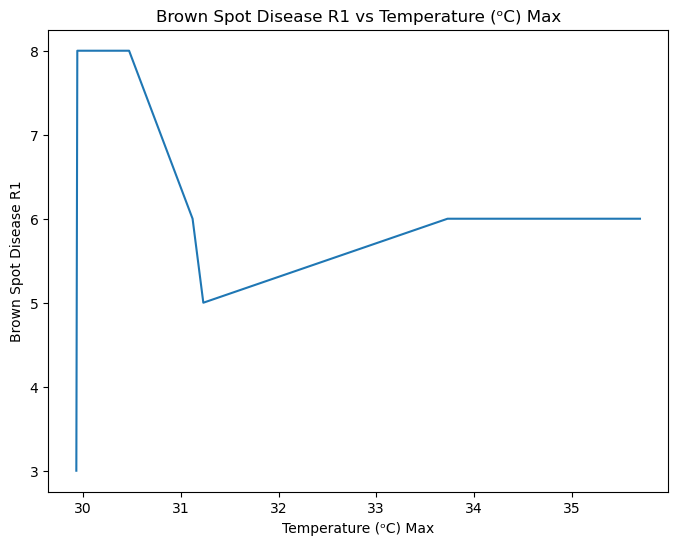

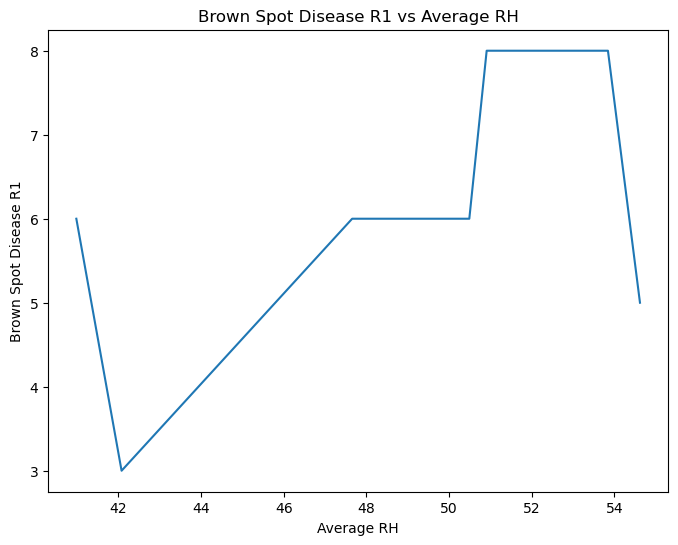

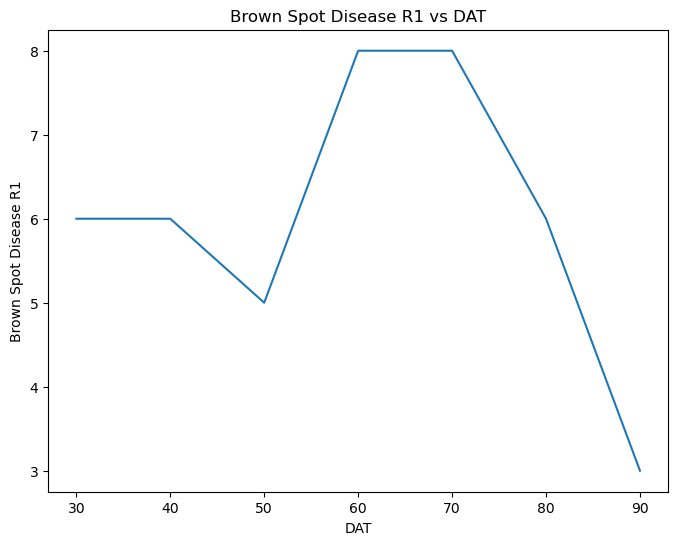

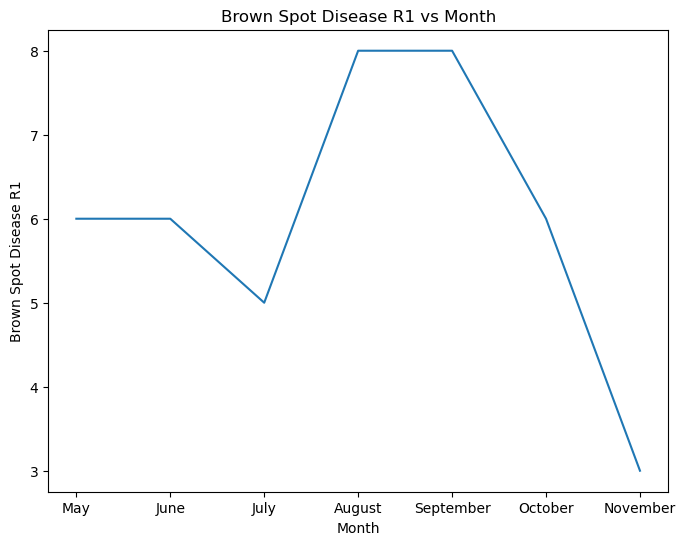

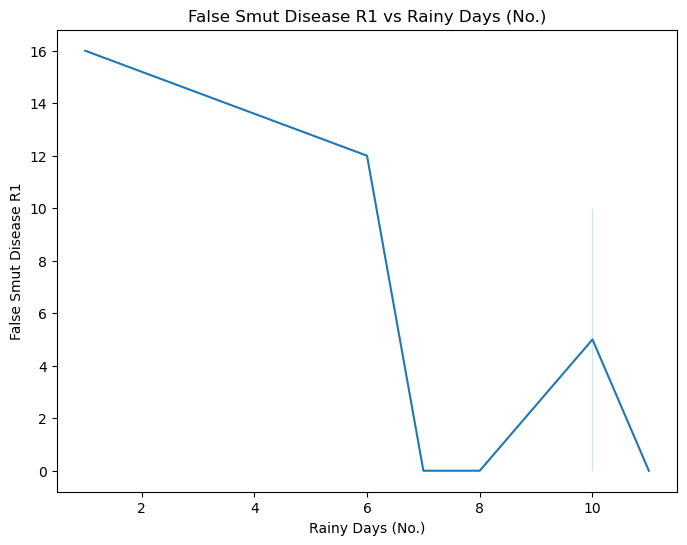

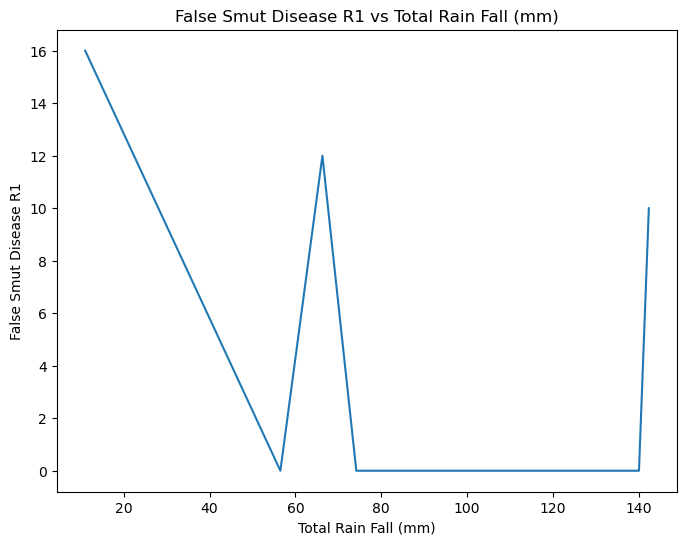

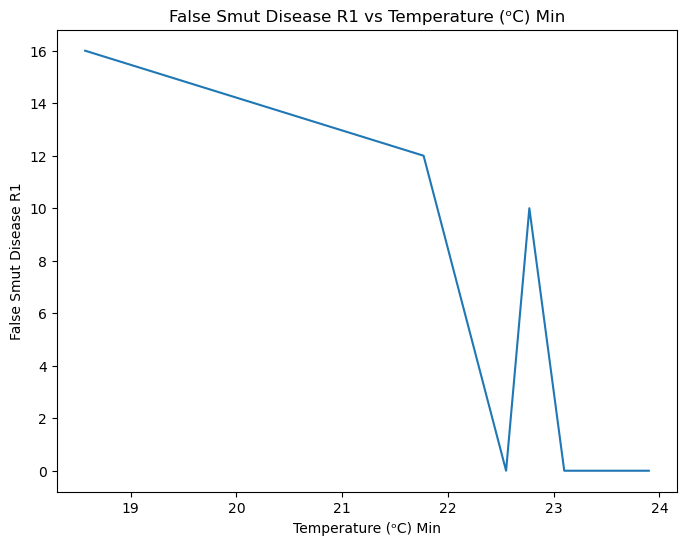

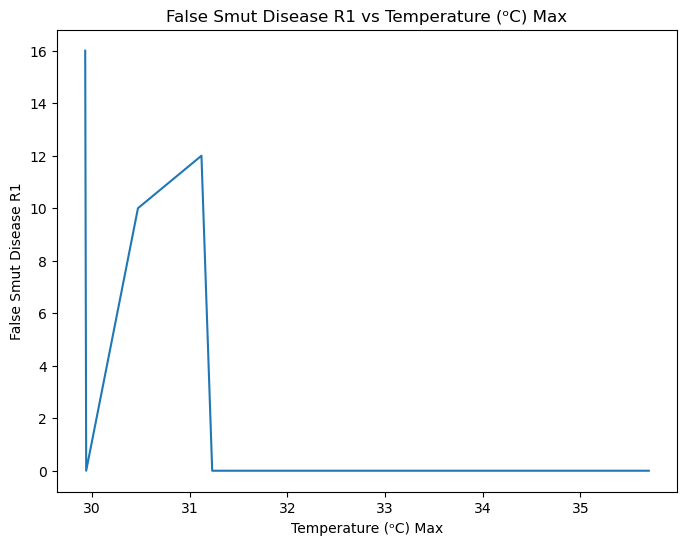

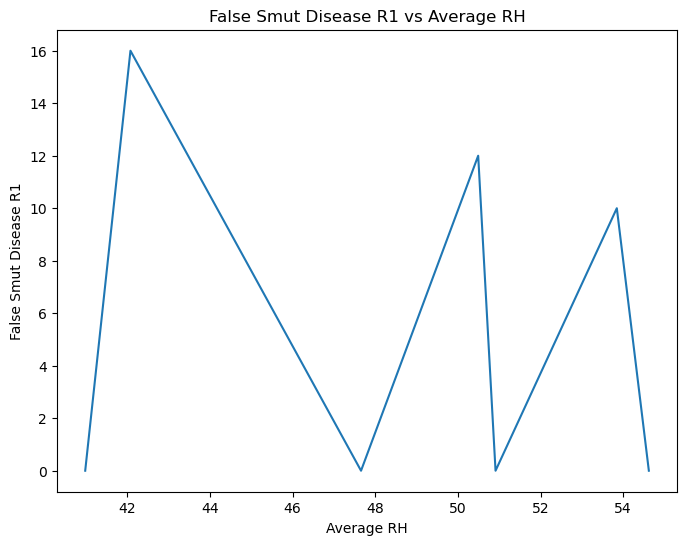

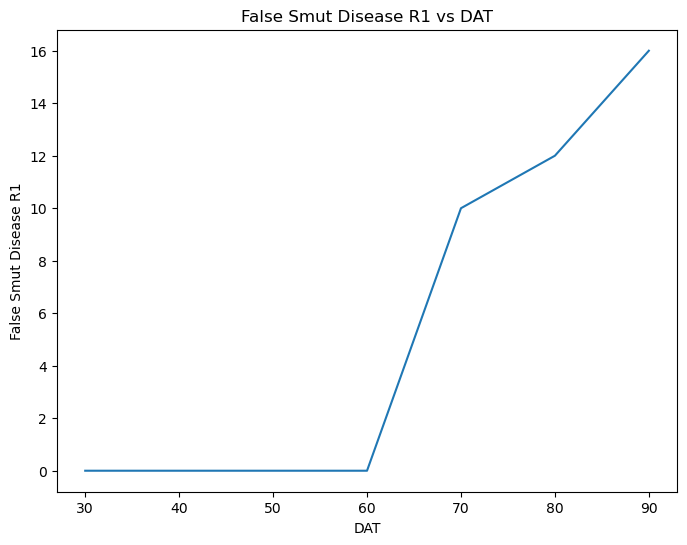

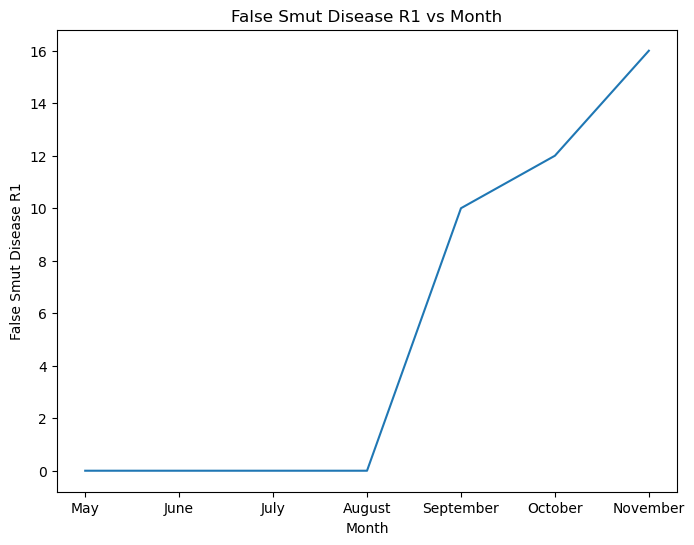

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of disease columns
disease_columns = ['Blast Disease R1', 'Bacterial Blight Disease R1', 'Brown Spot Disease R1', 'False Smut Disease R1']

# Select parameters for bivariate analysis
parameters = ['Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Min', 'Temperature (ᵒC) Max', 'Average RH', 'DAT', 'Month']

# Loop through diseases and parameters to create line charts
for disease_column in disease_columns:
    for parameter in parameters:
        plt.figure(figsize=(8, 6))
        
        # If the column name has spaces, use .loc
        sns.lineplot(x=df_2020[parameter], y=df_2020.loc[:, disease_column])
        plt.title(f'{disease_column} vs {parameter}')
        plt.xlabel(parameter)
        plt.ylabel(disease_column)
        plt.show()

### Analysis For 2020


### Brown Spot Disease severity  recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Increases/ Nuetral
      3. Avg RH - Increases
      4. DAT - Neutral 
   ######  Rainfall and RH causes Brown Disease Spot more , DAT and Temp is neutral factor
    
    
### False Smut Disease severity recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Decreases
      2. Temp Min & Max - Decreases
      3. Avg RH - Neutral
      4. DAT - Increases
   ######   DAT causes False Smut Disease more, Rainfall, RH and temp doesn't affect
   
   
### Blast Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Increases/ Neutral
      3. Avg RH - Increases
      4. DAT - Decreases
   ######  Rainfall and RH causes Blast Disease more, other doesn't affect
 
 
### Bacterial Blight Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Increases / Neutral
      3. Avg RH - Increases
      4. DAT - Decreases
   ######  Rainfall and RH causes Bacterial Blight Disease more, other doesn't affect

#### Data Analysis for 2021

Text(0.5, 1.0, 'correlation of feature')

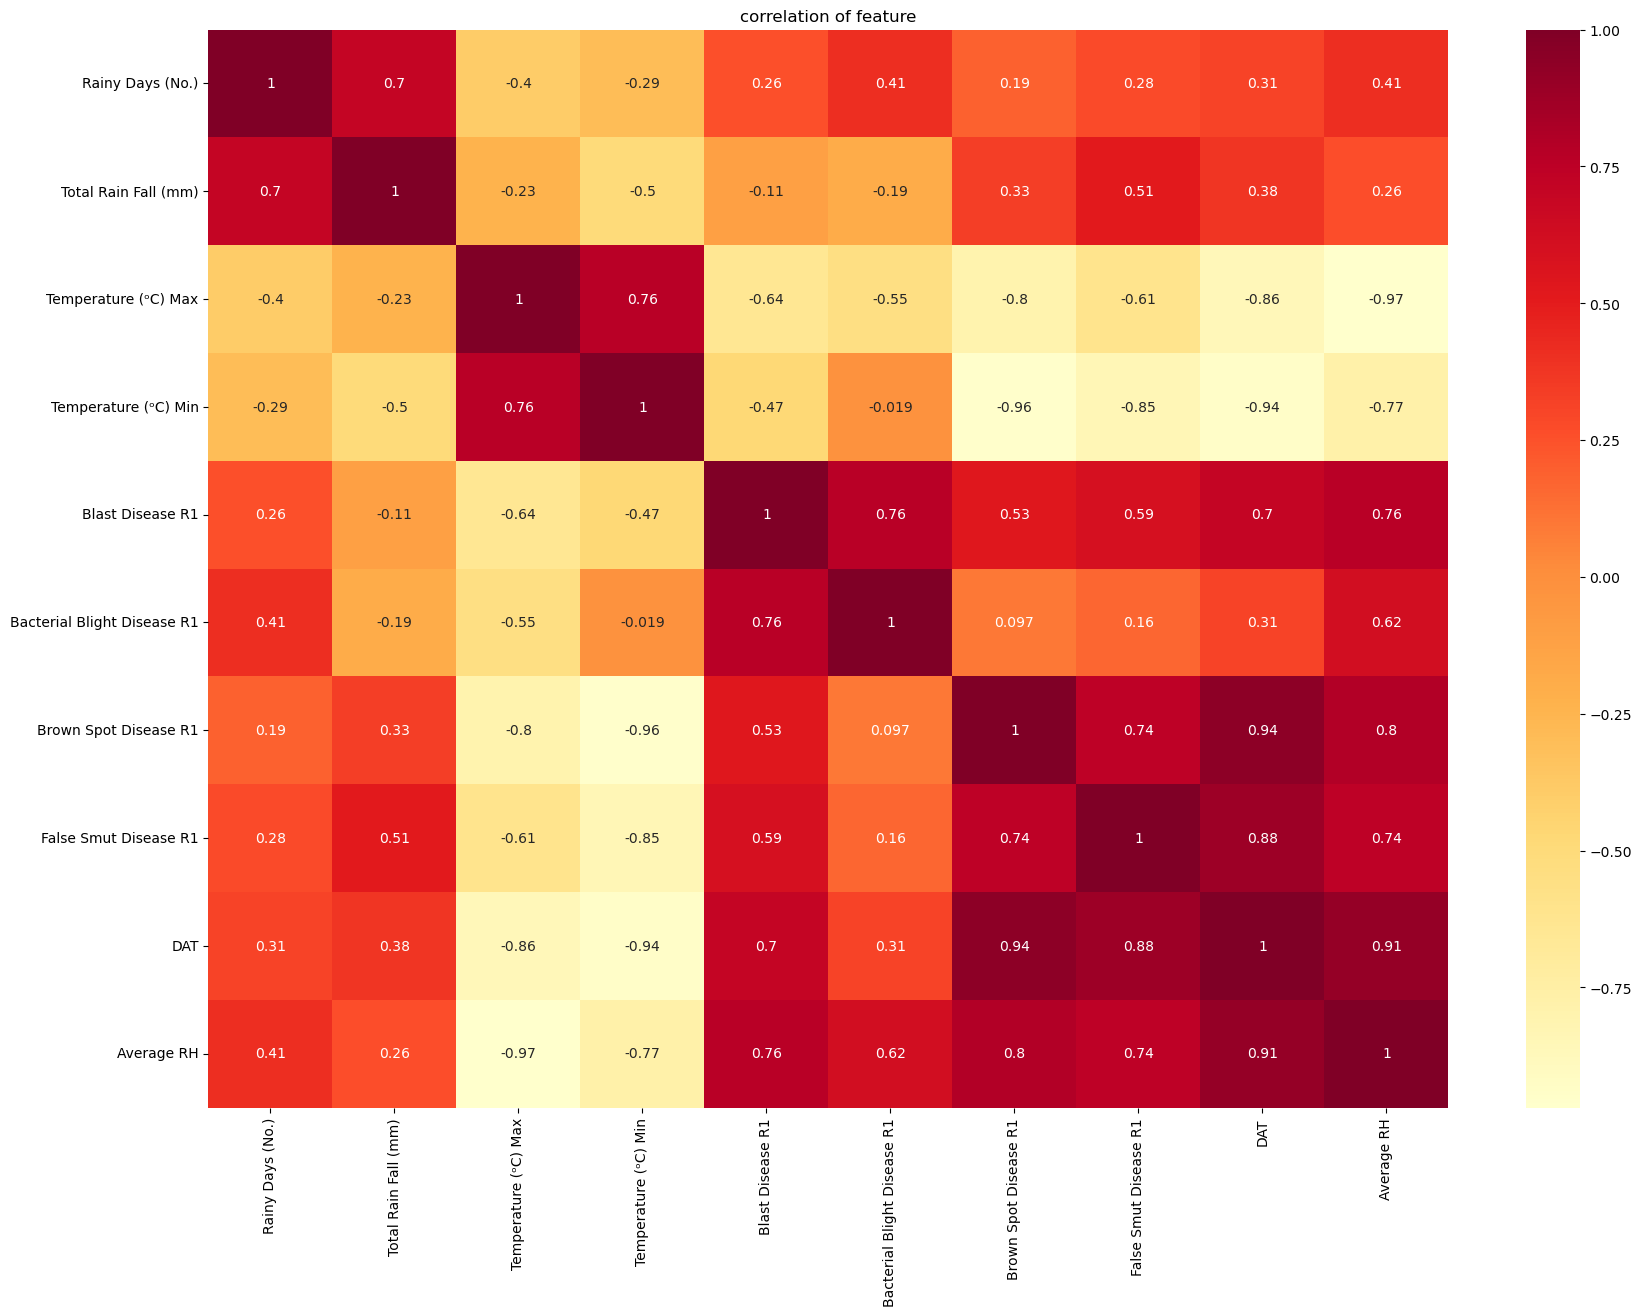

In [15]:
# Using heatmap to understand correlation better in dataset data
# Heatmap of correlation


plt.figure(figsize = (20,14))
sns.heatmap(df_2021.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

### Correlation heatmap  relation between columns:


Biggest correlations:

Bacterial Disease + Temp min : 0.9

Avg RH & Blast Disease : 0.76
    
Avg RH & Bacterial Disease : 0.57

Total Rain + avg RH / Bacterial Disease: 0.74


Brown spot + Temp max : -0.8

Temp max & Blast Disease : -0.64

False smut + Rainy days : -0.61

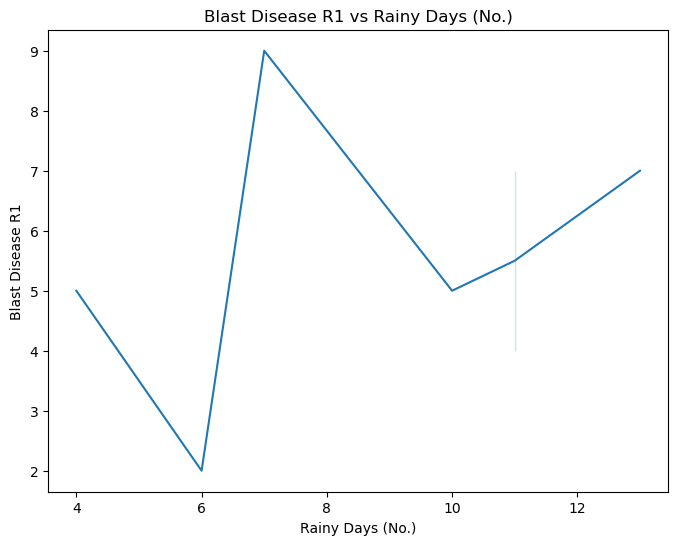

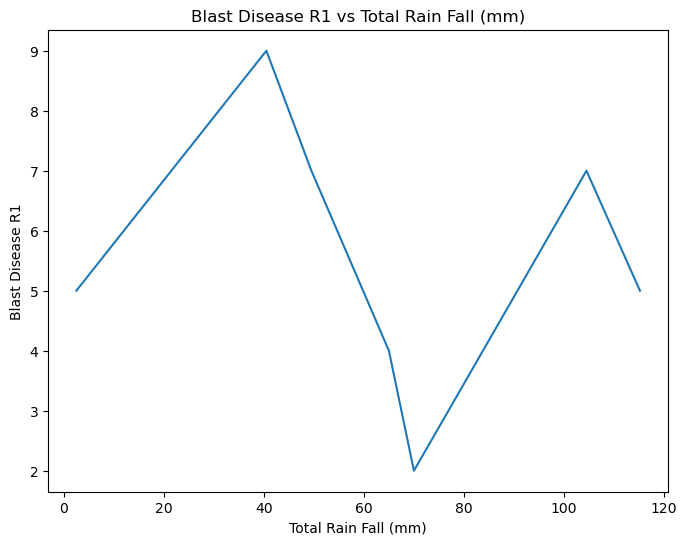

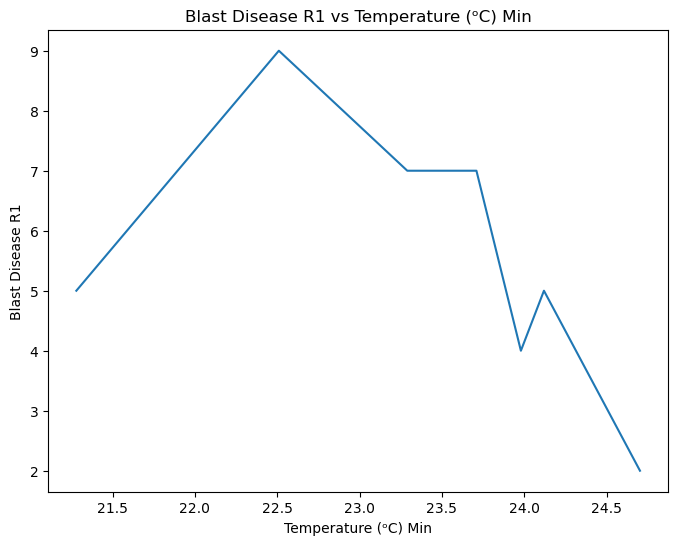

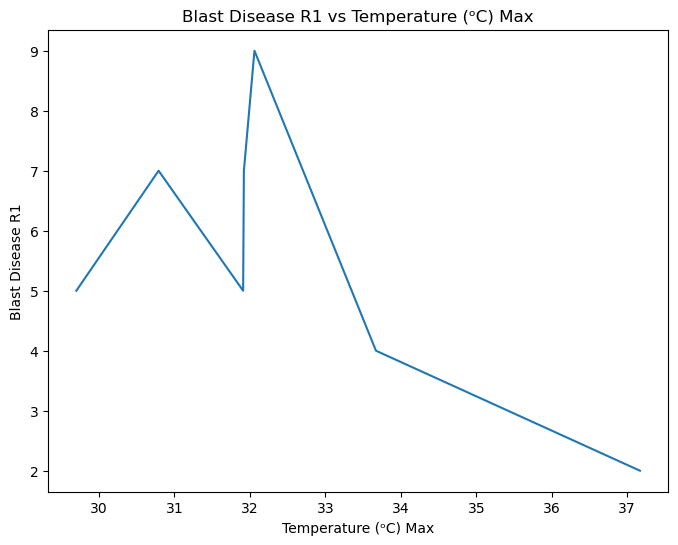

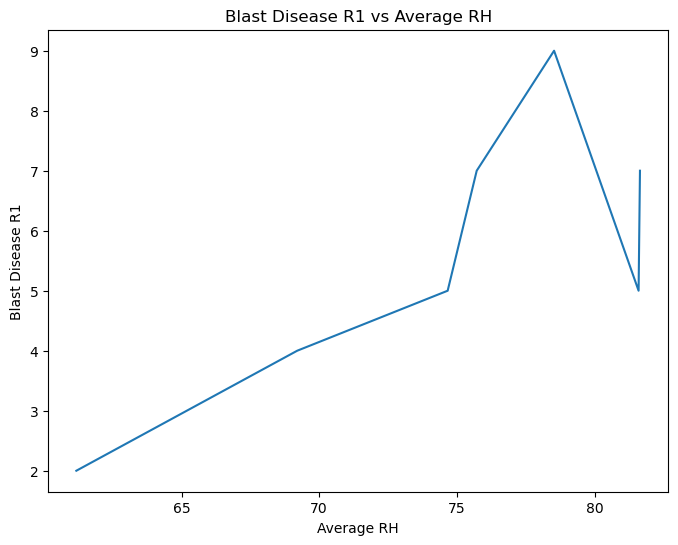

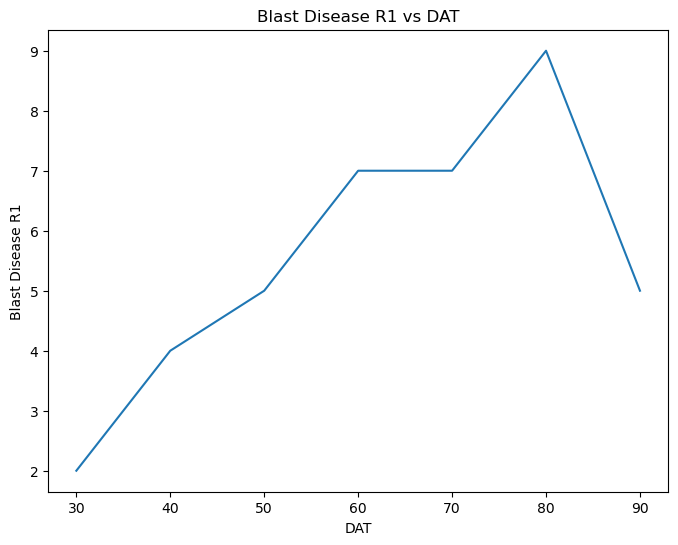

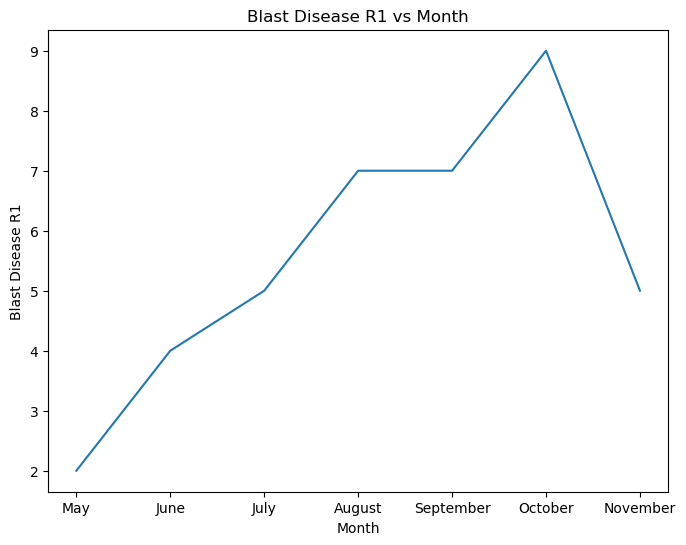

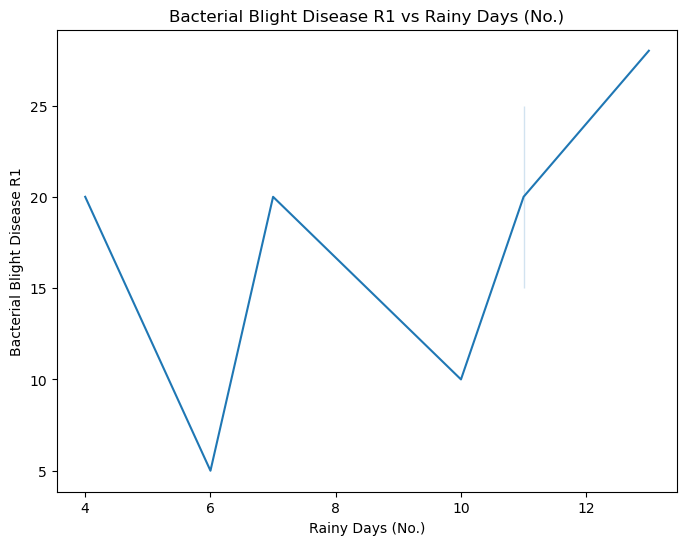

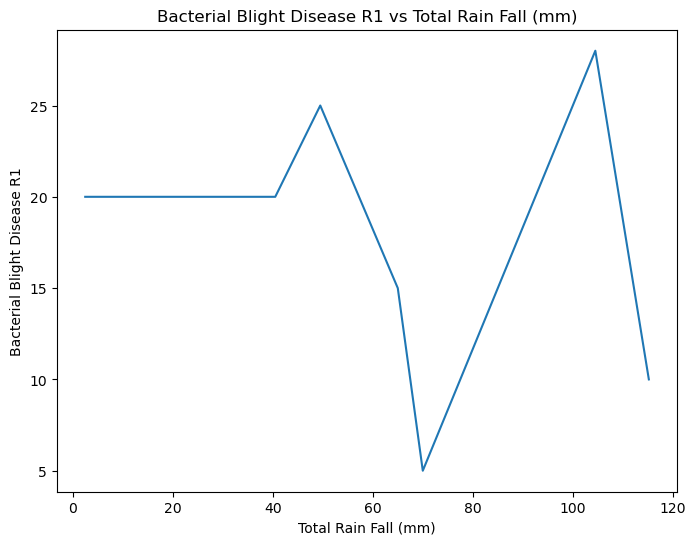

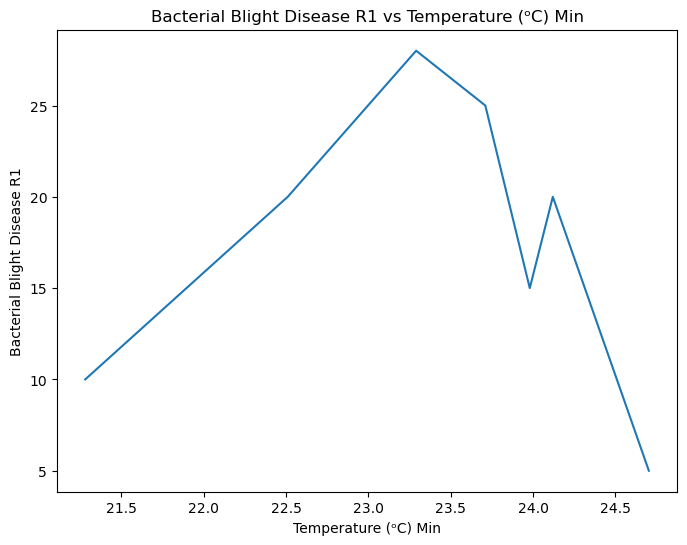

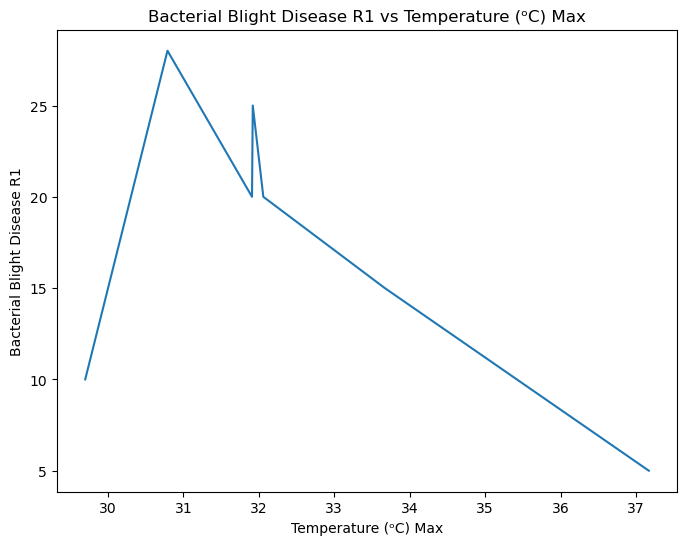

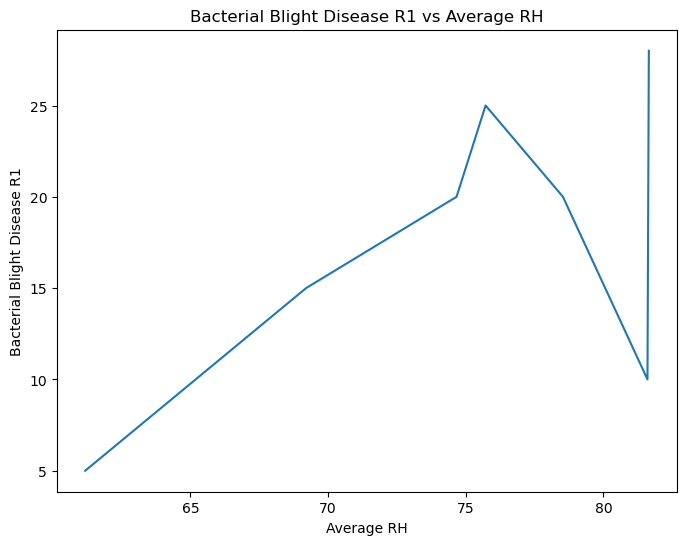

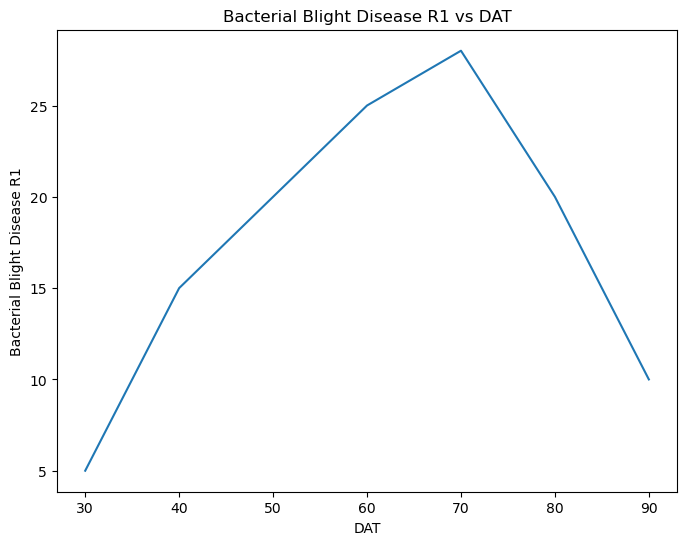

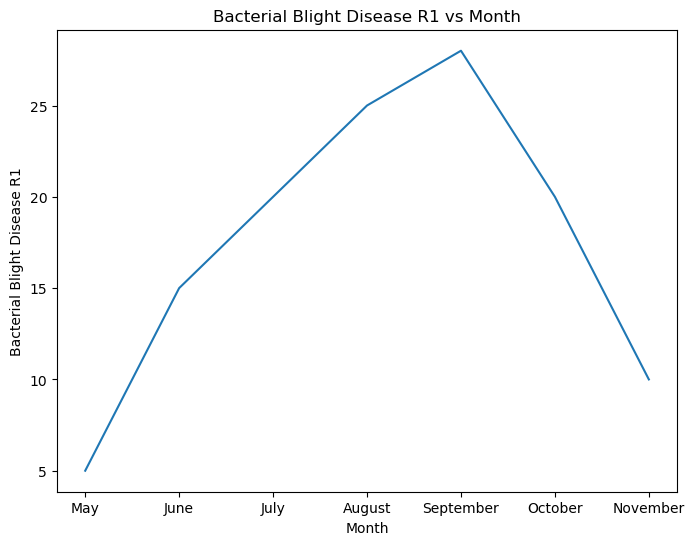

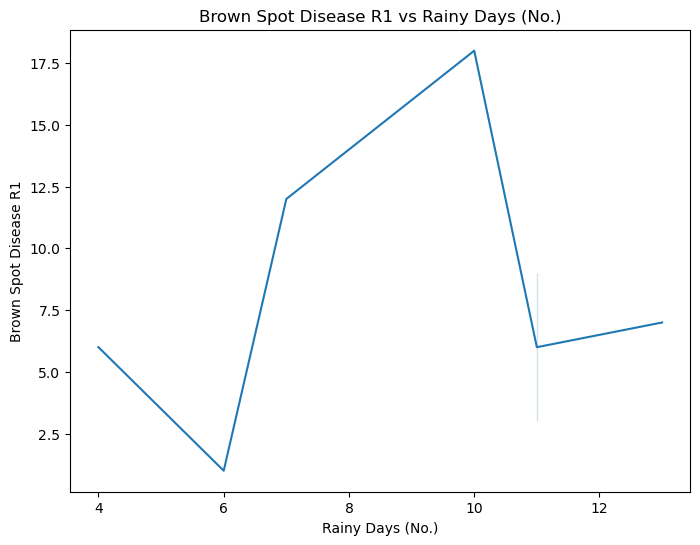

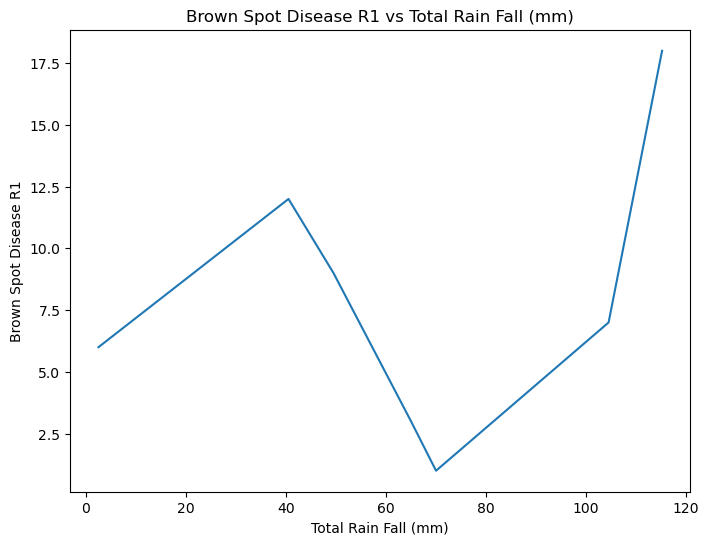

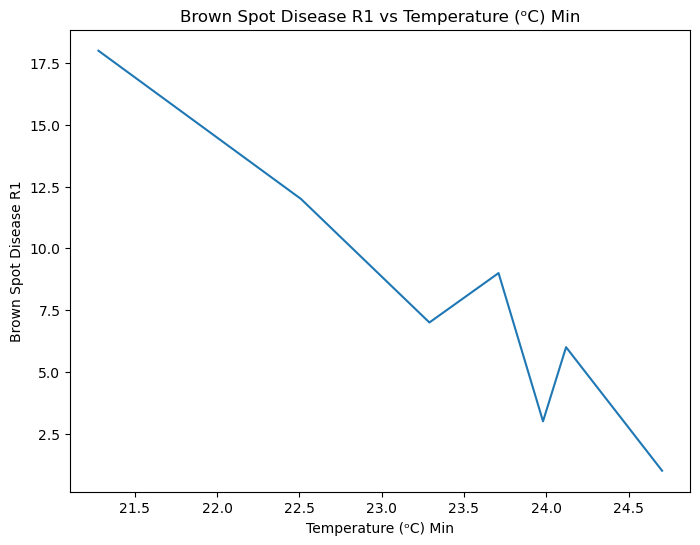

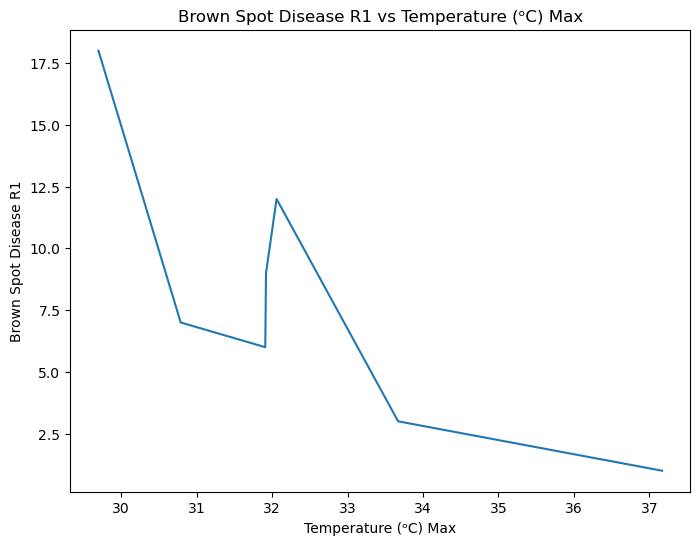

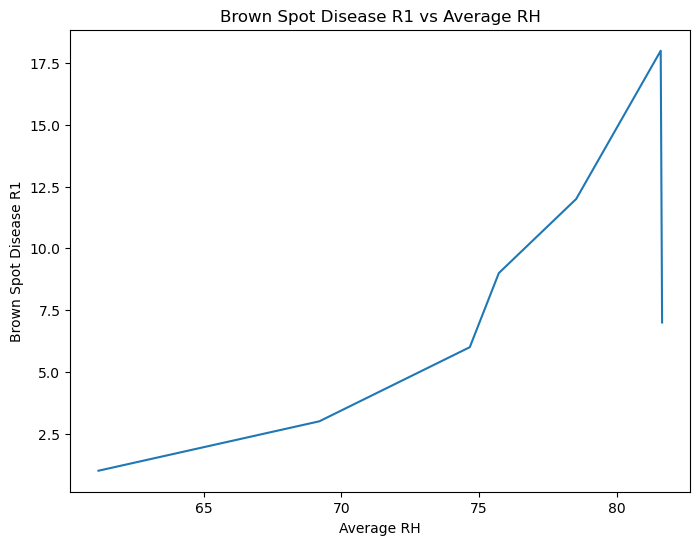

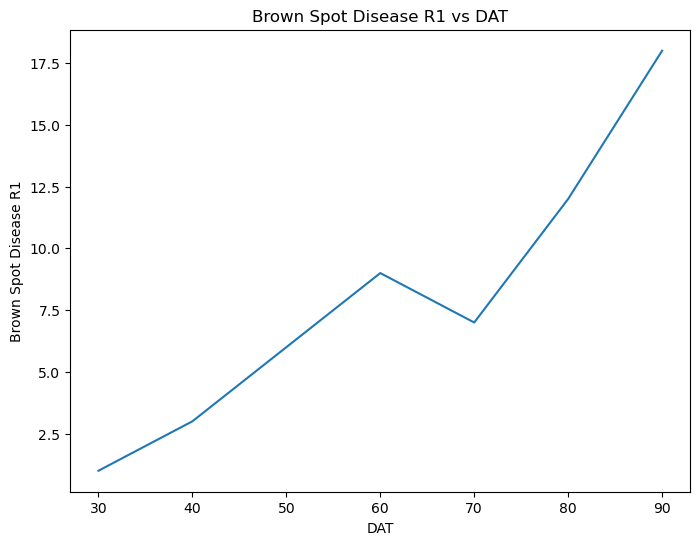

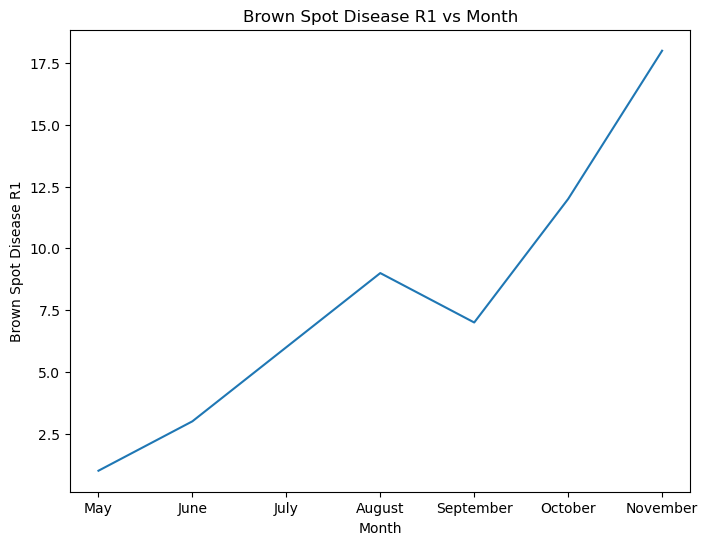

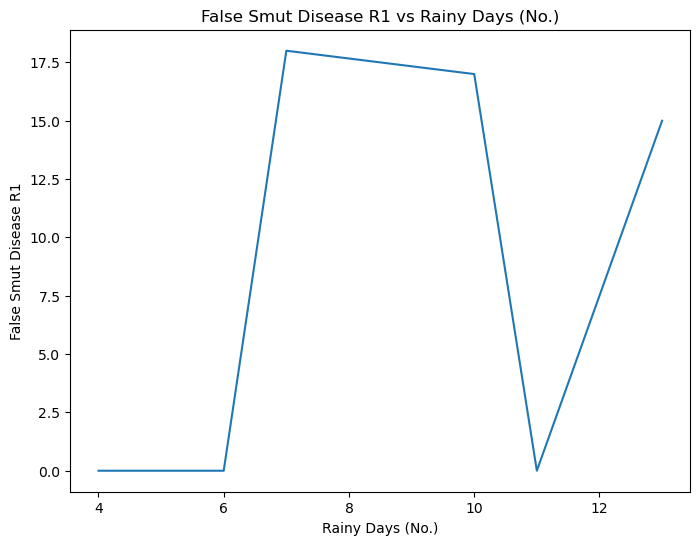

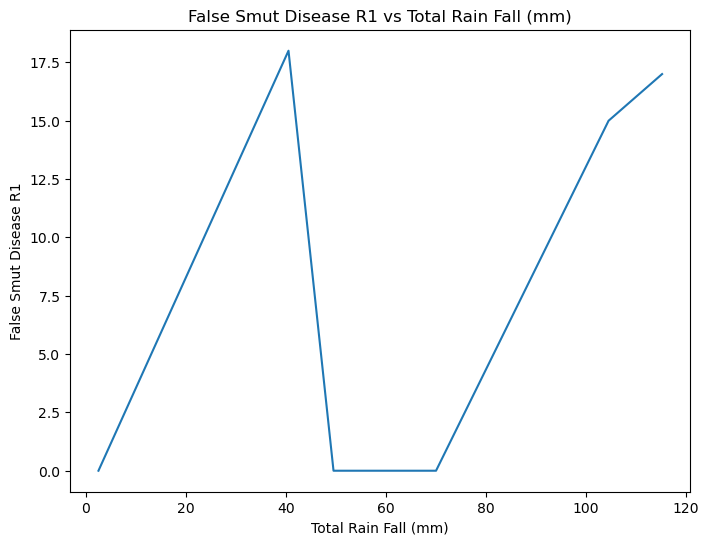

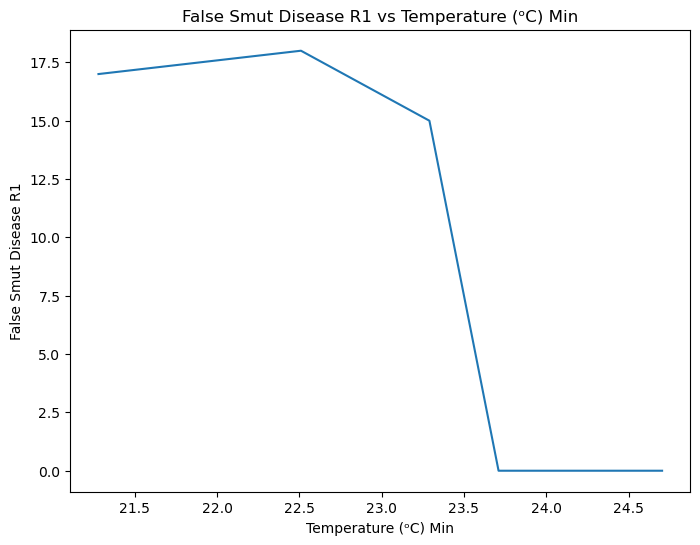

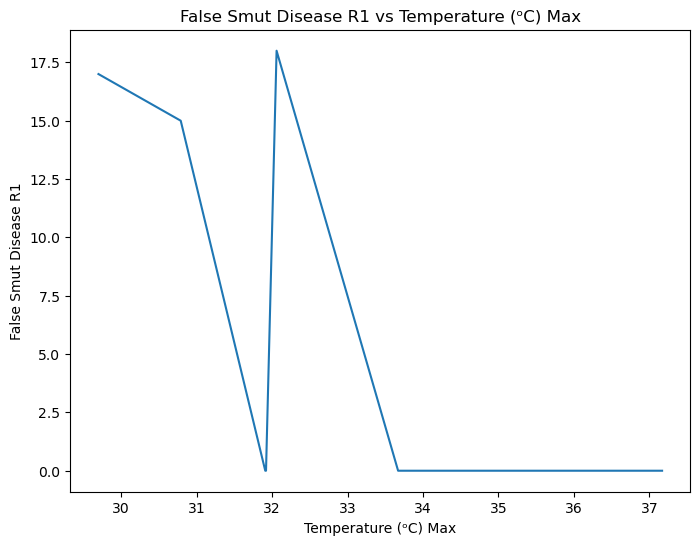

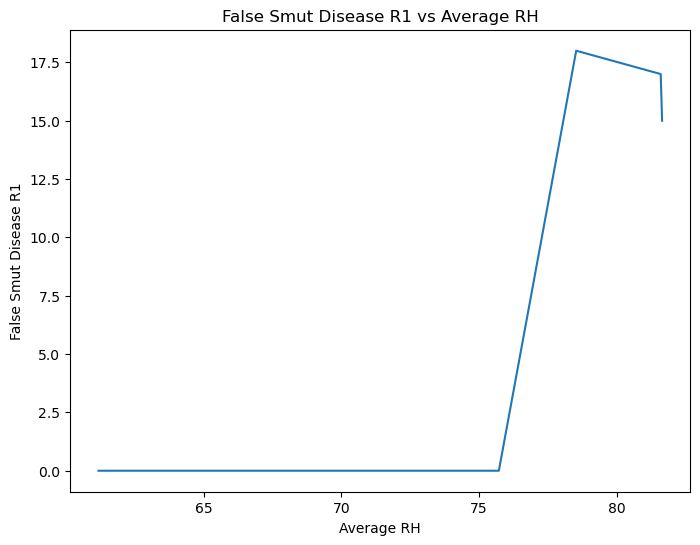

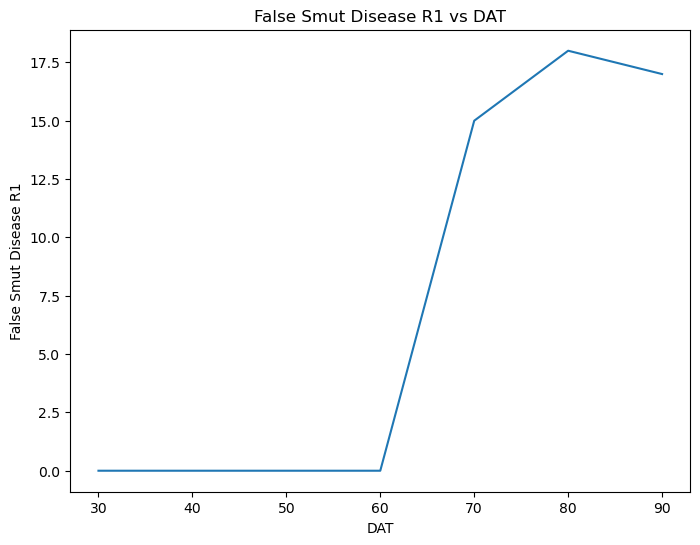

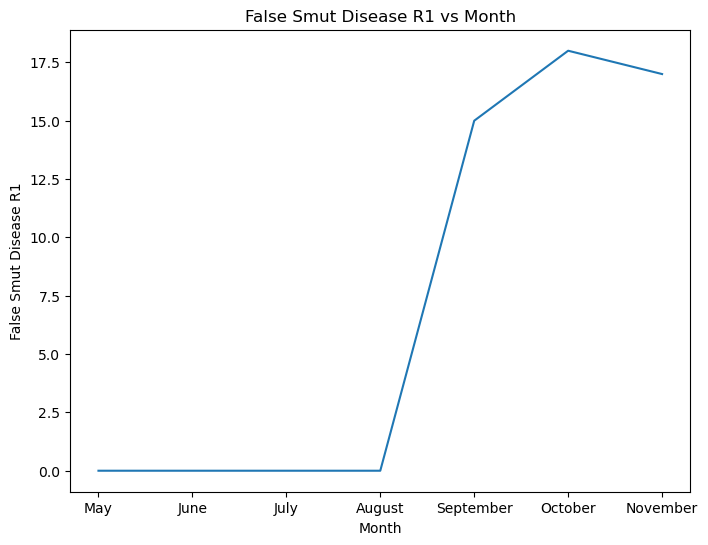

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of disease columns
disease_columns = ['Blast Disease R1', 'Bacterial Blight Disease R1', 'Brown Spot Disease R1', 'False Smut Disease R1']

# Select parameters for bivariate analysis
parameters = ['Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Min', 'Temperature (ᵒC) Max', 'Average RH', 'DAT' , 'Month']

# Loop through diseases and parameters to create line charts
for disease_column in disease_columns:
    for parameter in parameters:
        plt.figure(figsize=(8, 6))
        
        # If the column name has spaces, use .loc
        sns.lineplot(x=df_2021[parameter], y=df_2021.loc[:, disease_column])
        
        plt.title(f'{disease_column} vs {parameter}')
        plt.xlabel(parameter)
        plt.ylabel(disease_column)
        plt.show()


### Analysis For 2021


### Brown Spot Disease severity  recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Nuetral
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Increases 
   ######  DAT and RH causes Brown Disease Spot more , Rainfall and Temp is neutral factor
    
    
### False Smut Disease severity recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Nuetral
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Increases
   ######   RH and DAT causes False Smut Disease more, Rainfall and temp doesn't affect
   
   
### Blast Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Neutral
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Increases
   ######  DAT and RH causes Blast Disease more, other doesn't affect
 
 
### Bacterial Blight Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Increases / Neutral
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Neutral
   ######  Rainfall and RH causes Bacterial Blight Disease more, other doesn't affect

#### Data Analysis for 2022


Text(0.5, 1.0, 'correlation of feature')

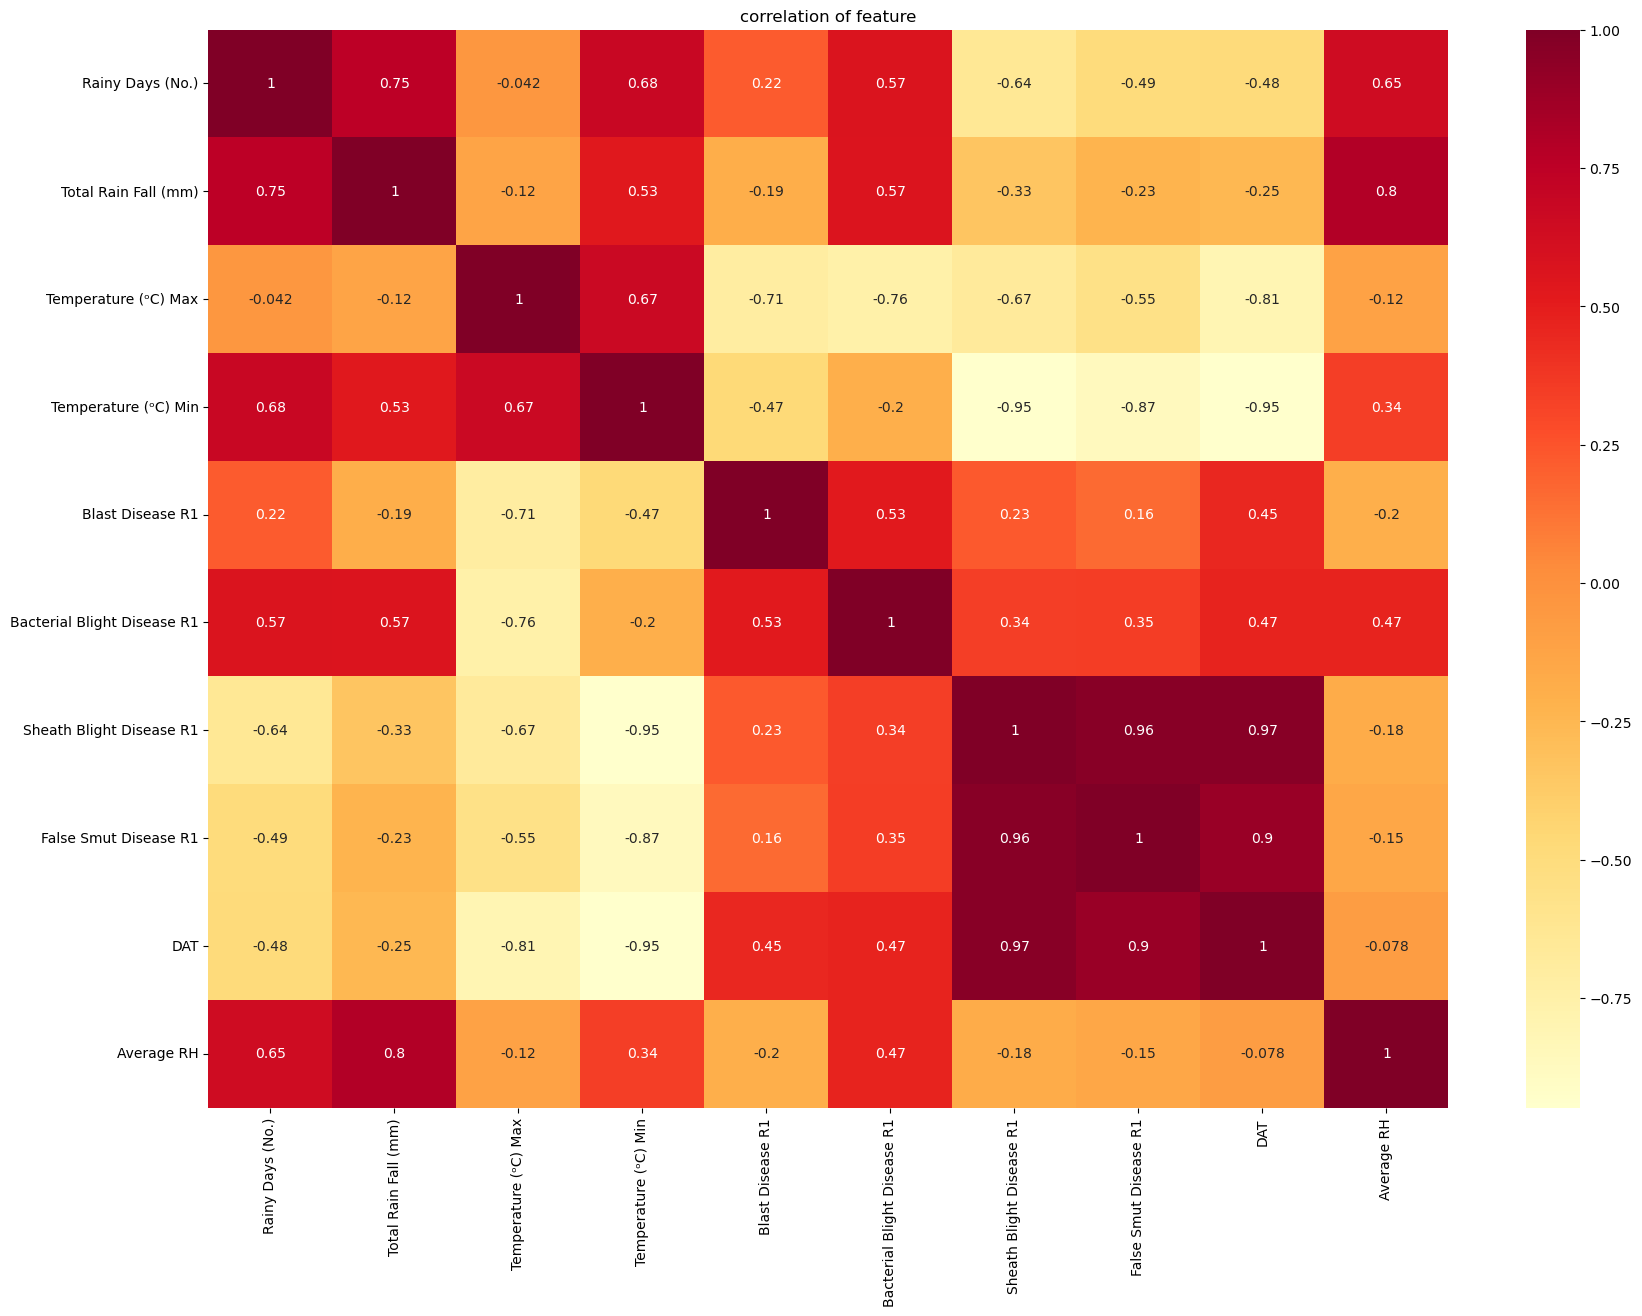

In [17]:
# Heatmap of correlation

plt.figure(figsize = (20,14))
sns.heatmap(df_2022.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

### Correlation heatmap  relation between columns:


Biggest correlations:
    
Avg RH & Bacterial Disease : 0.47

Total Rain + avg RH : 0.8

Total Rain + Bacterial Disease : 0.57

Bacterial blight Disease + Temp max : - 0.76

Sheath Blight Disease + Temp min : - 0.9

Sheath Blight Disease + Temp min : - 0.87

Temp max & Blast Disease : - 0.71

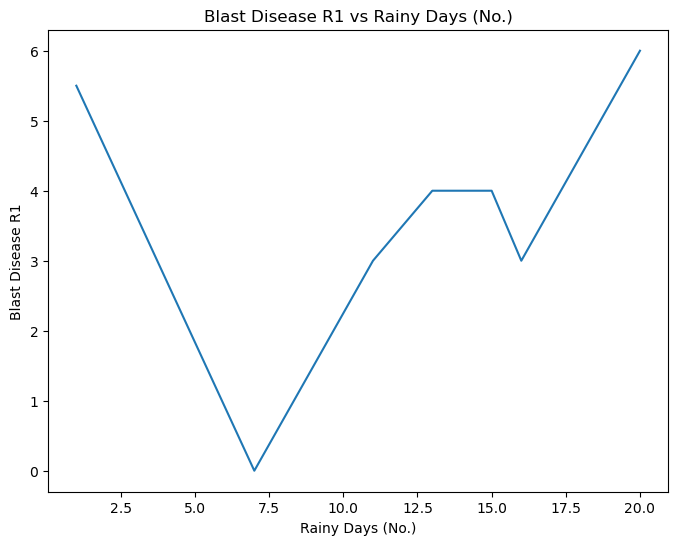

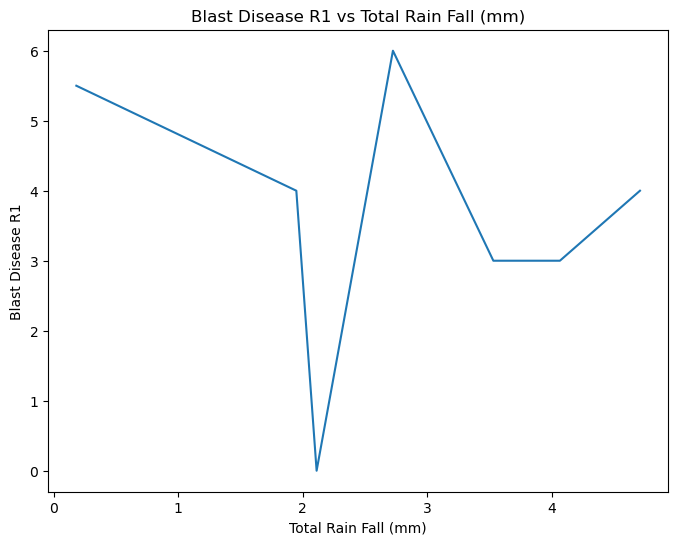

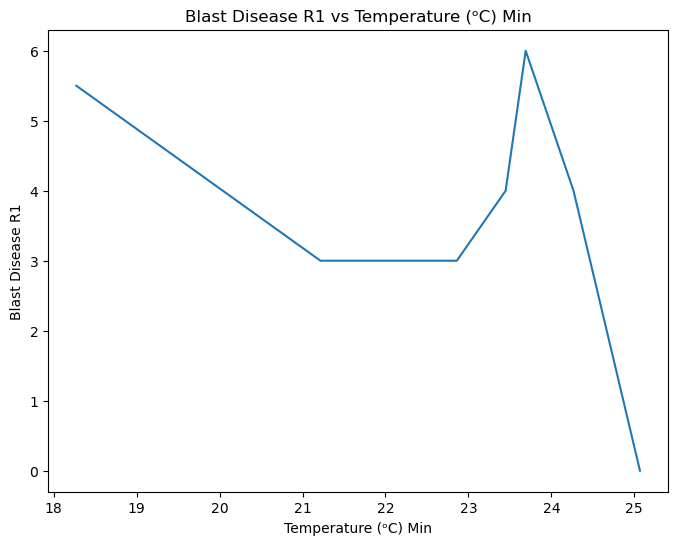

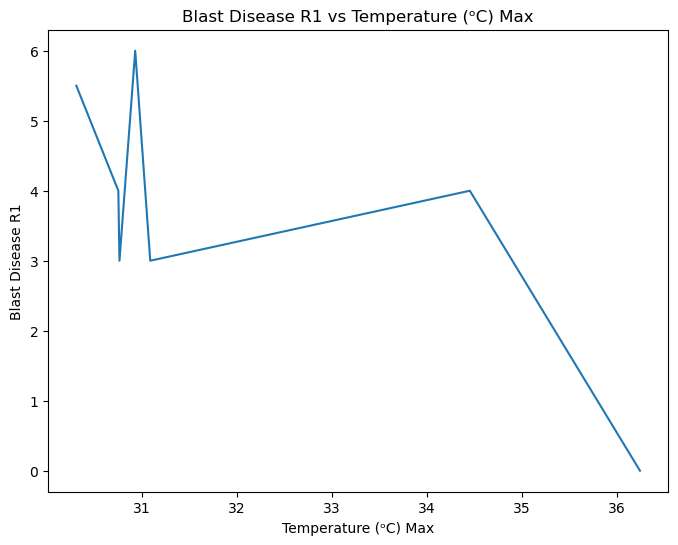

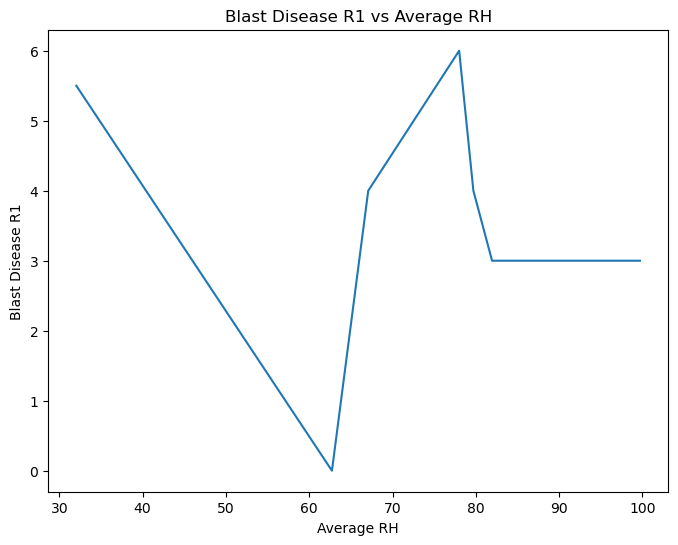

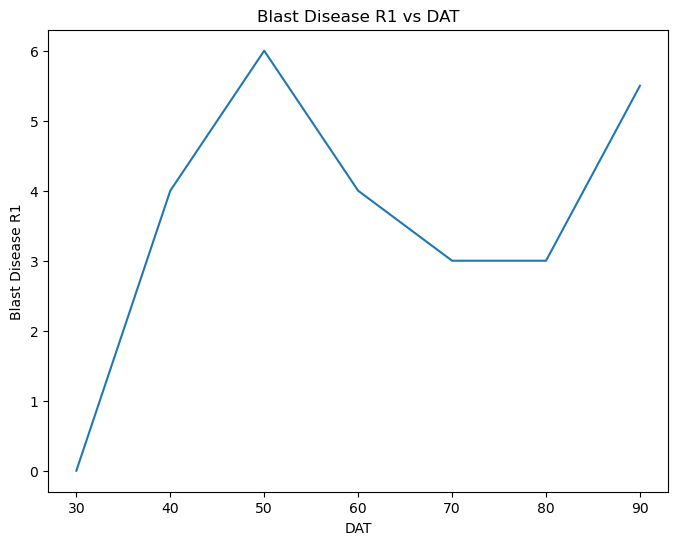

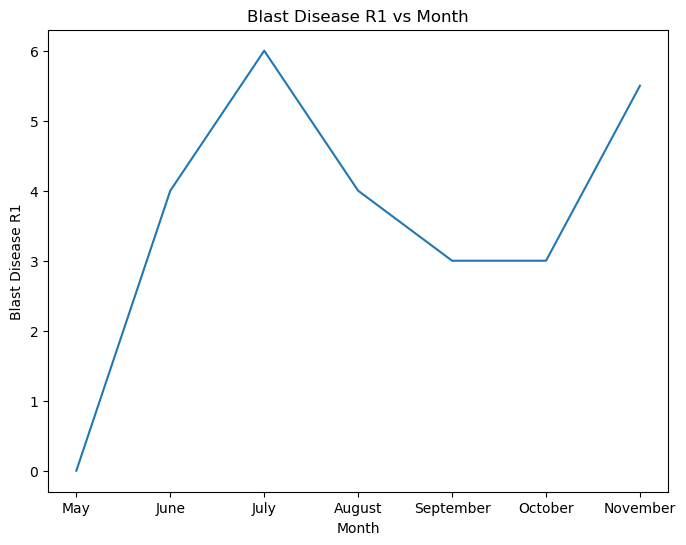

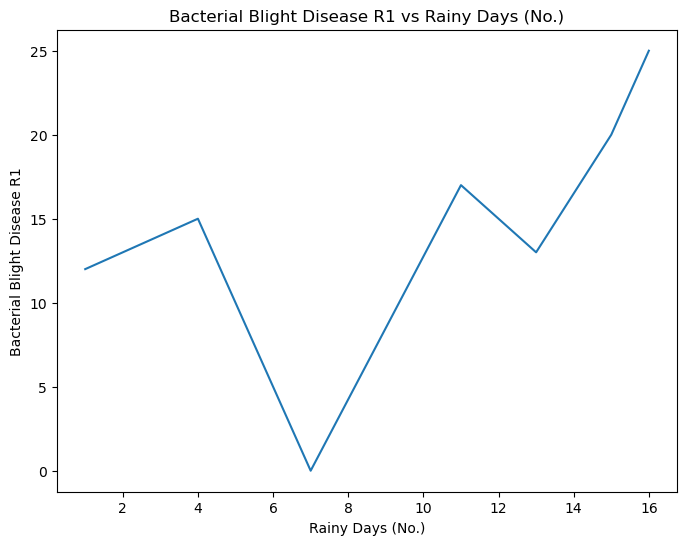

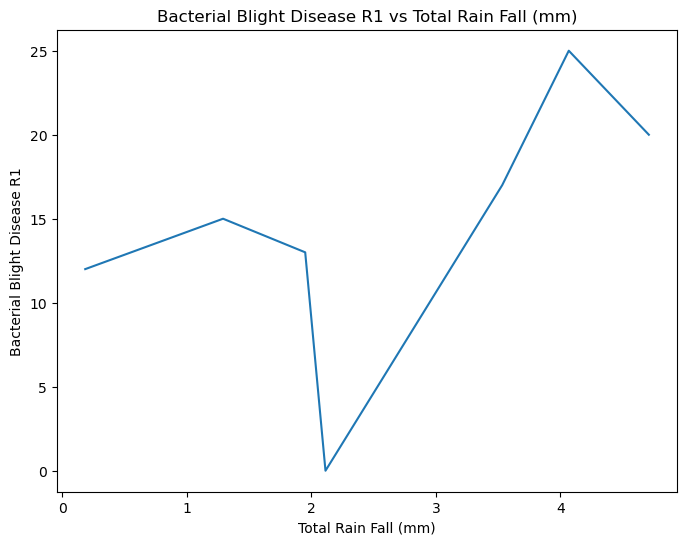

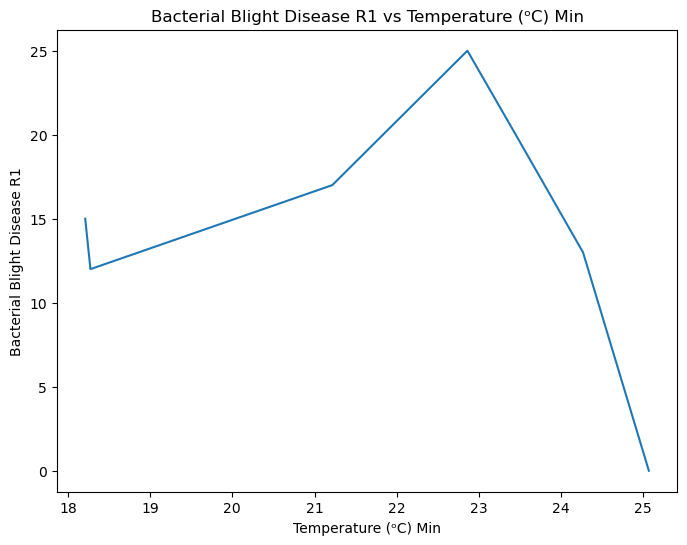

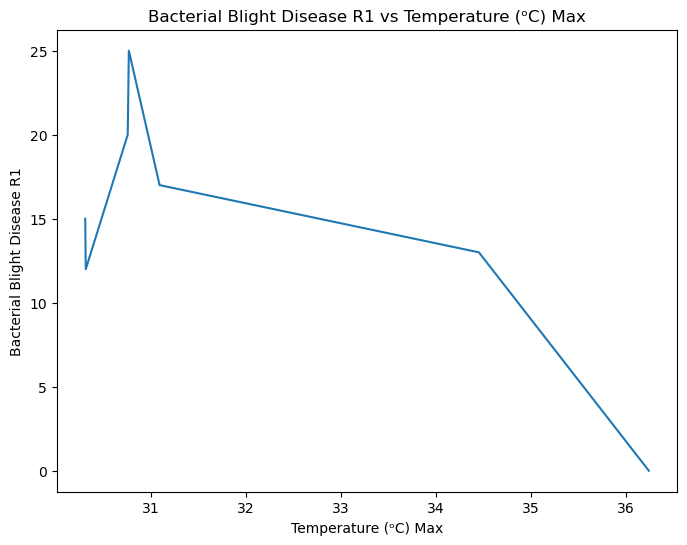

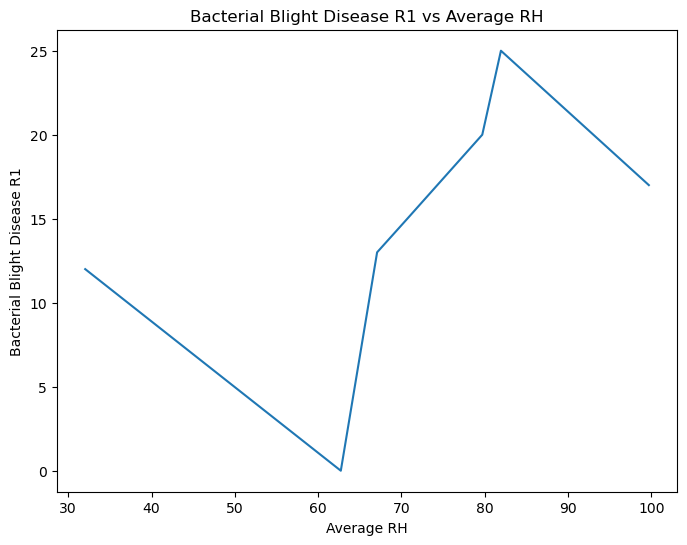

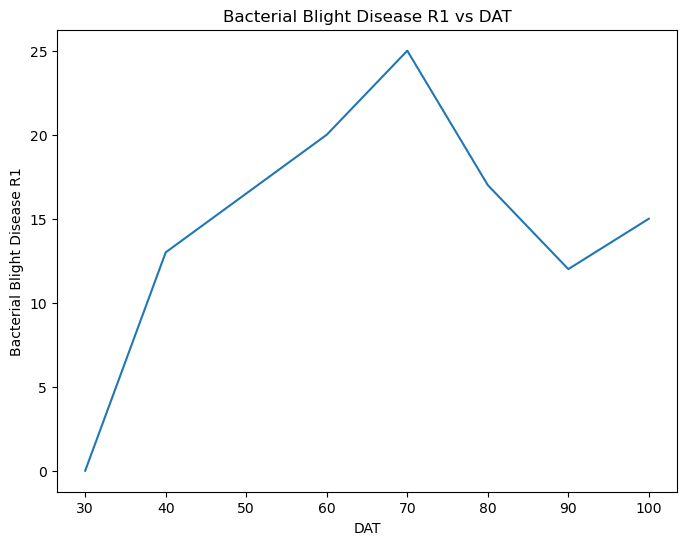

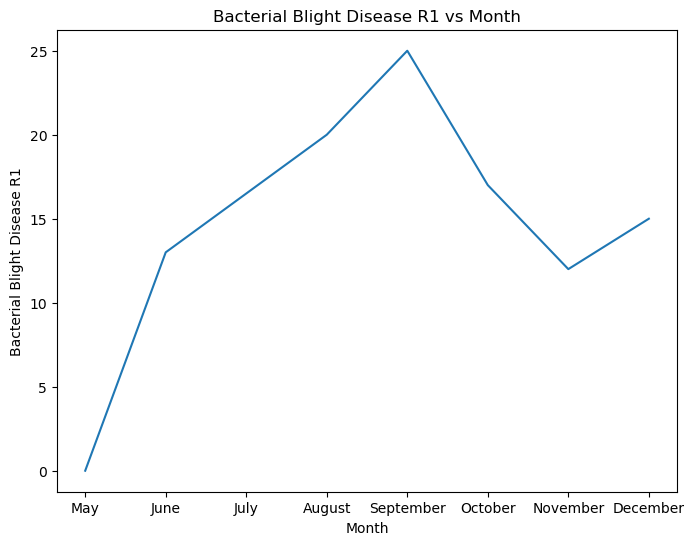

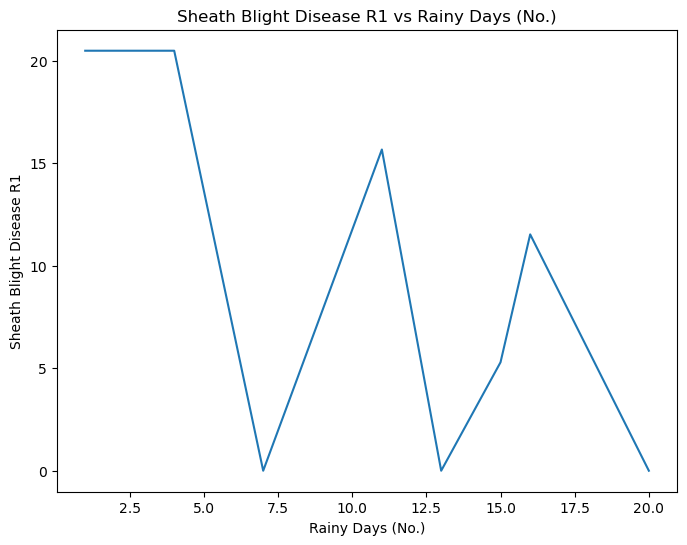

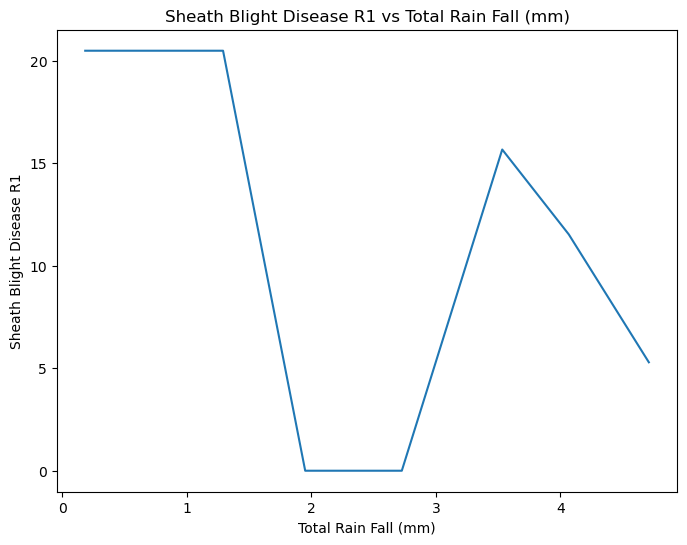

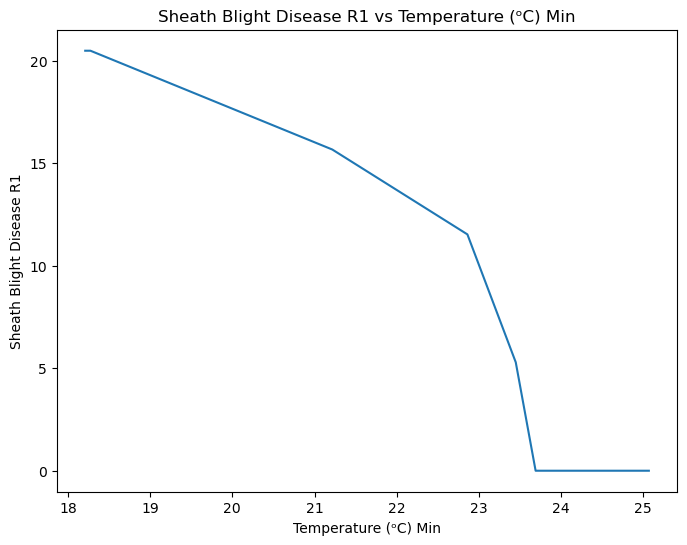

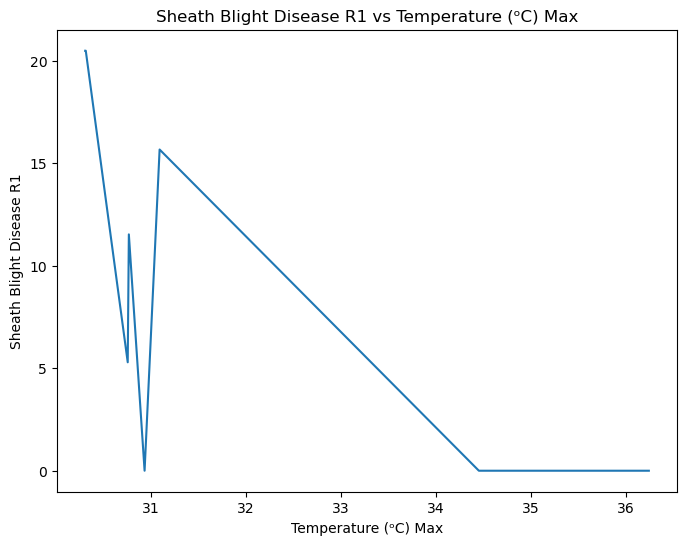

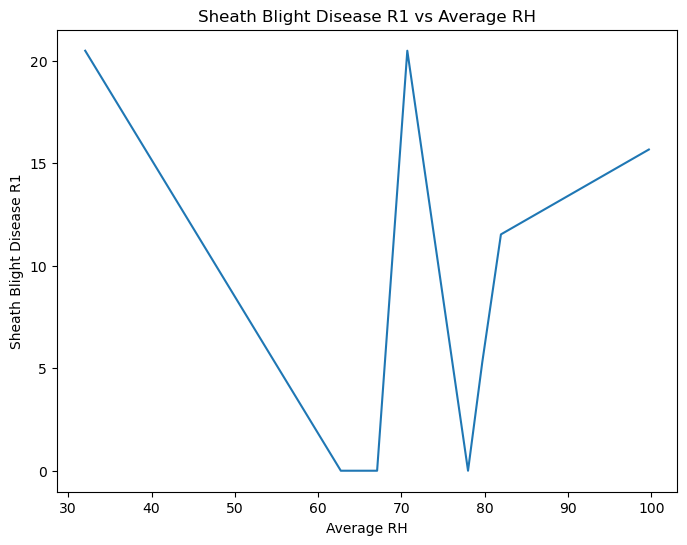

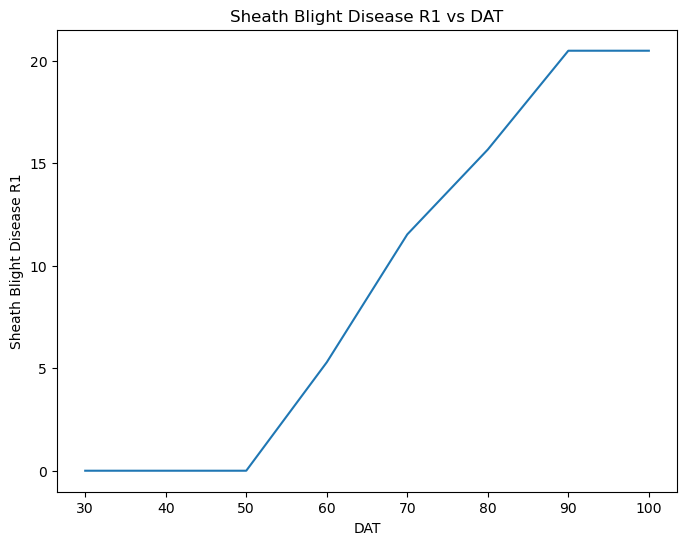

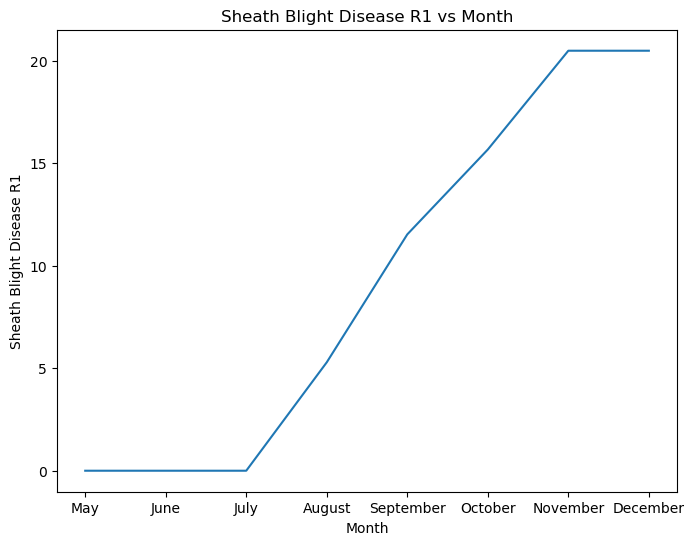

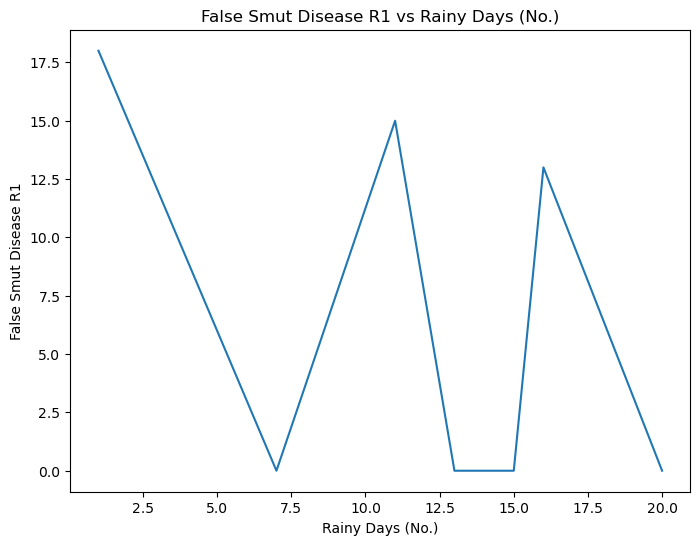

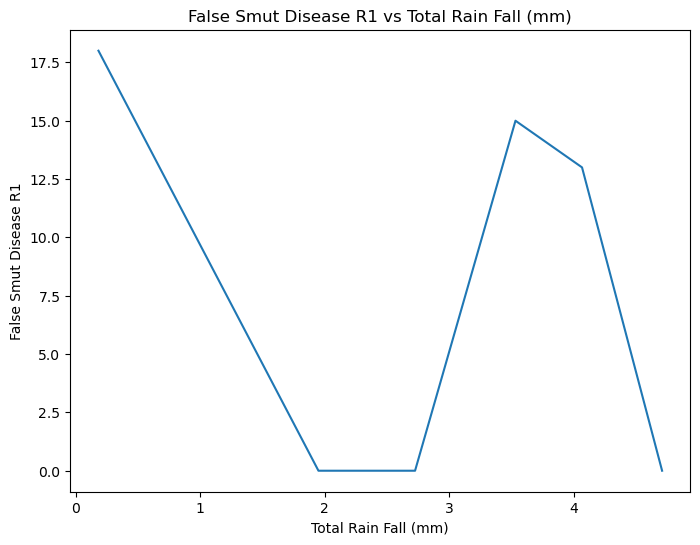

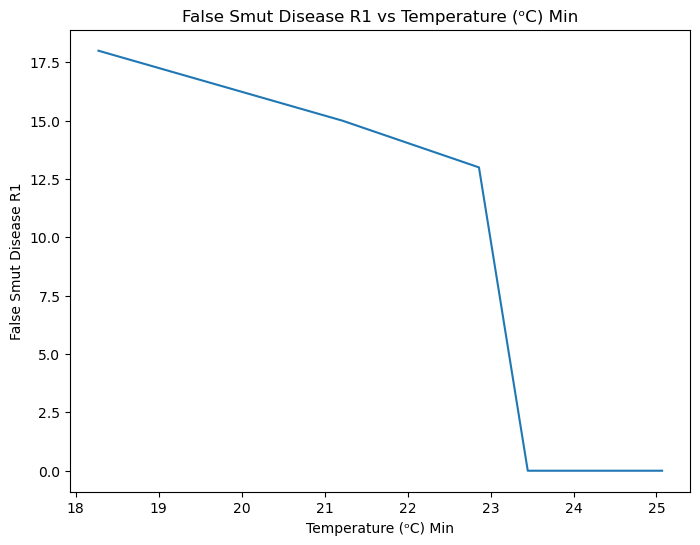

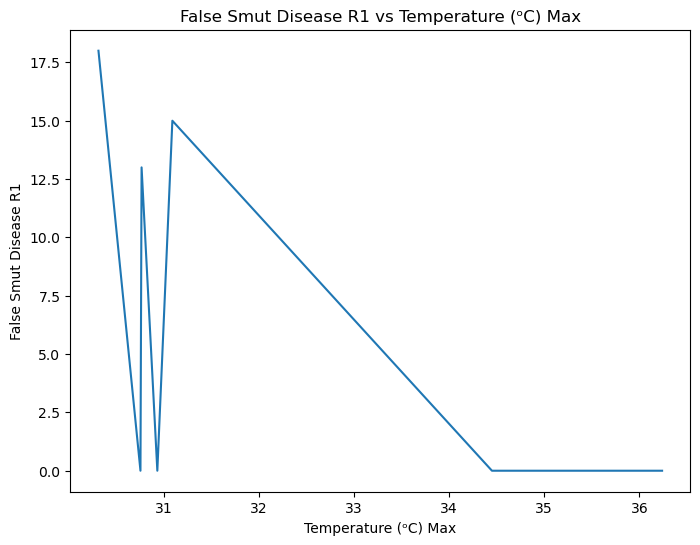

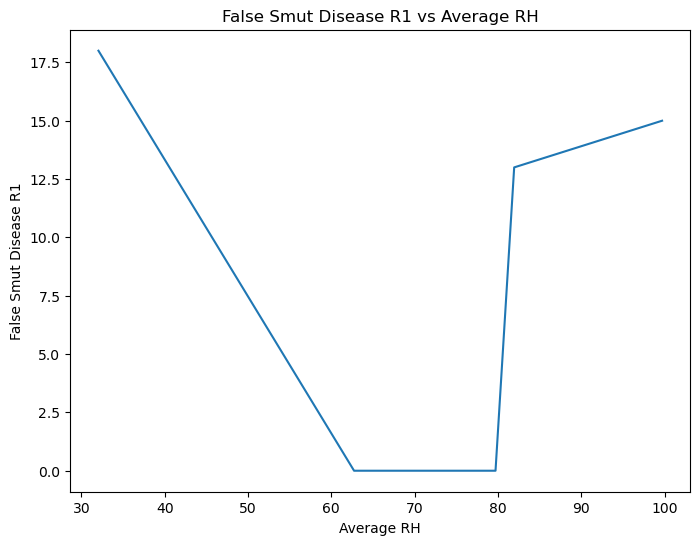

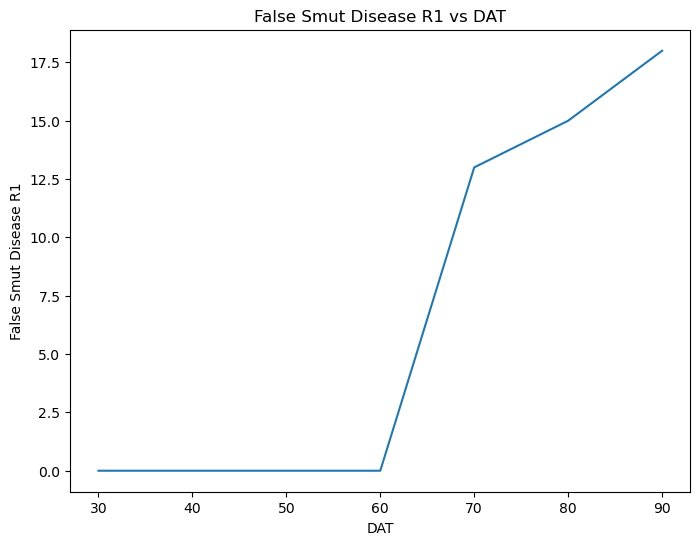

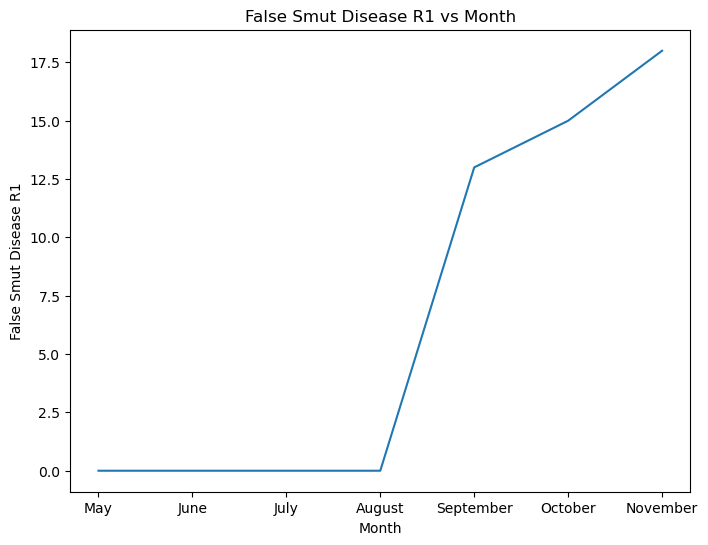

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of disease columns
disease_columns = ['Blast Disease R1', 'Bacterial Blight Disease R1', 'Sheath Blight Disease R1', 'False Smut Disease R1']

# Select parameters for bivariate analysis
parameters = ['Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Min', 'Temperature (ᵒC) Max', 'Average RH', 'DAT' , 'Month']

# Loop through diseases and parameters to create line charts
for disease_column in disease_columns:
    for parameter in parameters:
        plt.figure(figsize=(8, 6))
        
        # If the column name has spaces, use .loc
        sns.lineplot(x=df_2022[parameter], y=df_2022.loc[:, disease_column])
        
        plt.title(f'{disease_column} vs {parameter}')
        plt.xlabel(parameter)
        plt.ylabel(disease_column)
        plt.show()


### Analysis For 2022


### Sheath Blight Disease severity  recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Nuetral
      2. Temp Min & Max - Decreases
      3. Avg RH - Nuetral
      4. DAT - Increases 
   ######  DAT causes Sheath Blight Disease Spot more , Temp is neutral factor
    
    
### False Smut Disease severity recorded as PDI at R1 - 
      1. Rainy Days & Total Rainfall - Nuetral
      2. Temp Min & Max - Decreases
      3. Avg RH - Nuetral
      4. DAT - Increases
   ######   DAT causes False Smut Disease more, Rainfall and temp doesn't affect
   
   
### Blast Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Increases
      2. Temp Min & Max - Nuetral
      3. Avg RH - Neutral
      4. DAT - Neutral
   ######  Rainfall causes Blast Disease more, other doesn't affect
 
 
### Bacterial Blight Disease severity recorded as PDI at R1- 
      1. Rainy Days & Total Rainfall - Increases / Neutral
      2. Temp Min & Max - Decreases
      3. Avg RH - Increases
      4. DAT - Increases
   ######  Rainfall and RH , DAT causes Bacterial Blight Disease more, other doesn't affect

In [19]:
df_2019

Month  Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0        May                 1                   7.6                 38.64   
1       June                 7                  45.2                 34.83   
2       July                 9                  57.0                 32.19   
3     August                 5                  37.9                 29.87   
4  September                14                 251.4                 29.73   
5    October                12                 160.9                 30.58   
6   November                 1                   6.1                 30.00   

   Temperature (ᵒC) Min  Blast Disease R1  Bacterial Blight Disease R1  \
0                 24.41               2.0                          4.0   
1                 24.43               3.0                          6.0   
2                 23.58               2.0                          5.0   
3                 22.51               2.0                          5.0   
4                 22.80               1.0                          3.0   
5                 21.90               1.0                          4.0   
6                 19.56               2.0                          3.0   

   Brown Spot Disease R1  False Smut Disease R1  DAT  Average RH  
0                    6.0                    0.0   30      34.480  
1                    4.0                    0.0   40      47.250  
2                    5.0                    0.0   50      54.960  
3                    6.0                    0.0   60      58.770  
4                    8.0                    8.0   70      67.840  
5                    6.0                    9.0   80      72.950  
6                    3.0                   13.0   90      64.065

In [20]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        7 non-null      object 
 1   Rainy Days (No.)             7 non-null      int64  
 2   Total Rain Fall (mm)         7 non-null      float64
 3   Temperature (ᵒC) Max         7 non-null      float64
 4   Temperature (ᵒC) Min         7 non-null      float64
 5   Blast Disease R1             7 non-null      float64
 6   Bacterial Blight Disease R1  7 non-null      float64
 7   Brown Spot Disease R1        7 non-null      float64
 8   False Smut Disease R1        7 non-null      float64
 9   DAT                          7 non-null      int32  
 10  Average RH                   7 non-null      float64
dtypes: float64(8), int32(1), int64(1), object(1)
memory usage: 716.0+ bytes


In [21]:
def replace_month(df):
    df['Month'] = df['Month'].replace({
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    })
    return df

In [22]:
df_2019 = replace_month(df_2019)
df_2020 = replace_month(df_2020)
df_2021 = replace_month(df_2021)
df_2022 = replace_month(df_2022)


In [23]:
df_2019

Month  Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0      5                 1                   7.6                 38.64   
1      6                 7                  45.2                 34.83   
2      7                 9                  57.0                 32.19   
3      8                 5                  37.9                 29.87   
4      9                14                 251.4                 29.73   
5     10                12                 160.9                 30.58   
6     11                 1                   6.1                 30.00   

   Temperature (ᵒC) Min  Blast Disease R1  Bacterial Blight Disease R1  \
0                 24.41               2.0                          4.0   
1                 24.43               3.0                          6.0   
2                 23.58               2.0                          5.0   
3                 22.51               2.0                          5.0   
4                 22.80               1.0                          3.0   
5                 21.90               1.0                          4.0   
6                 19.56               2.0                          3.0   

   Brown Spot Disease R1  False Smut Disease R1  DAT  Average RH  
0                    6.0                    0.0   30      34.480  
1                    4.0                    0.0   40      47.250  
2                    5.0                    0.0   50      54.960  
3                    6.0                    0.0   60      58.770  
4                    8.0                    8.0   70      67.840  
5                    6.0                    9.0   80      72.950  
6                    3.0                   13.0   90      64.065

In [24]:
# storing independent features, and Dependent var

factors_df2019 = df_2019[['Month', 'Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Max', 'Temperature (ᵒC) Min', 'DAT', 'Average RH']].copy()

factors_df2020 = df_2020[['Month', 'Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Max', 'Temperature (ᵒC) Min', 'DAT', 'Average RH']].copy()

factors_df2021 = df_2021[['Month', 'Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Max', 'Temperature (ᵒC) Min', 'DAT', 'Average RH']].copy()

factors_df2022 = df_2022[['Month', 'Rainy Days (No.)', 'Total Rain Fall (mm)', 'Temperature (ᵒC) Max', 'Temperature (ᵒC) Min', 'DAT', 'Average RH']].copy()

In [25]:
BlastDisease2019 = df_2019['Blast Disease R1'].copy()
BlastDisease2020 = df_2020['Blast Disease R1'].copy()
BlastDisease2021 = df_2021['Blast Disease R1'].copy()
BlastDisease2022 = df_2022['Blast Disease R1'].copy()

In [26]:
BacterialBlightDisease2019 = df_2019['Bacterial Blight Disease R1'].copy()
BacterialBlightDisease2020 = df_2020['Bacterial Blight Disease R1'].copy()
BacterialBlightDisease2021=df_2021['Bacterial Blight Disease R1'].copy()
BacterialBlightDisease2022 = df_2022['Bacterial Blight Disease R1'].copy()

In [27]:
BrownSpotDisease2019 = df_2019['Brown Spot Disease R1'].copy()
BrownSpotDisease2020 = df_2020['Brown Spot Disease R1'].copy()
BrownSpotDisease2021 = df_2021['Brown Spot Disease R1'].copy()

In [28]:
FalseSmutDisease2019 = df_2019['False Smut Disease R1'].copy()
FalseSmutDisease2020 = df_2020['False Smut Disease R1'].copy()
FalseSmutDisease2021 = df_2021['False Smut Disease R1'].copy()
FalseSmutDisease2022 = df_2022['False Smut Disease R1'].copy()

In [29]:
SheathBlightDisease2022 = df_2022['Sheath Blight Disease R1'].copy()

In [30]:
## Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(factors_df2019,BlastDisease2019, test_size=0.3 , random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Fit the model on the training data
model.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = model.predict(X_test1)

# Evaluate the model
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

print(f'Mean Squared Error: {mse}')   # lower values of MAE indicate better accuracy
print(f'R-squared: {r2}')  # Higher R-squared values indicate better accuracy

Mean Squared Error: 0.3419468320956116
R-squared: 0.4870797518565826


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=30) 

# Fit the model on the training data
rf_model.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred_rf1 = rf_model.predict(X_test1)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test1, y_pred_rf1)
r2_rf = r2_score(y_test1, y_pred_rf1)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.45846666666666663
R-squared (Random Forest): 0.3123


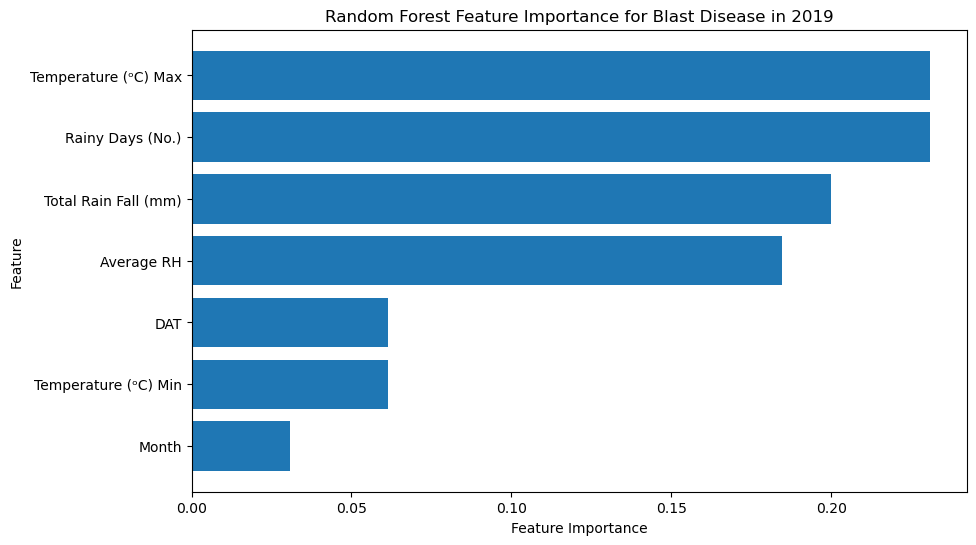

In [34]:
import numpy as np 
feature_importances = rf_model.feature_importances_

feature_names = X_train1.columns

sorted_idx = np.argsort(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for Blast Disease in 2019")
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Perform cross-validation
cv_scores = cross_val_score(model, X_train1, y_train1, cv=3, scoring='neg_mean_squared_error')

# Convert scores to positive as sklearn returns negative MSE
cv_scores = -cv_scores

# Calculate mean and standard deviation of MSE scores
mean_mse_cv = np.mean(cv_scores)
std_mse_cv = np.std(cv_scores)

print(f'Cross-validated Mean Squared Error: {mean_mse_cv}')
print(f'Standard Deviation of Cross-validated Mean Squared Error: {std_mse_cv}')


Cross-validated Mean Squared Error: 0.16859900938213168
Standard Deviation of Cross-validated Mean Squared Error: 0.23434339422027786


## Model Building for Prediction 

#####  the task involves predicting four target variables, using a multi-output regressor,  simple and effective approach for RandomForestRegressor from scikit-learn wrapped in MultiOutputRegressor.

###### Using cumulative Dataframe, created by averaging all the features for year 2019, 2020, 2021, 2022

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Load your averaged data
cumulativeDf = pd.read_excel(file_path, sheet_name='cumulativeData')

# Assuming the first 7 columns are features and the last 4 are targets
X = cumulativeDf.iloc[:, 1:7]  # Exclude the 'Month' column for modeling
Y = cumulativeDf.iloc[:, 7:]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Multi-output RandomForest Regressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, Y_train)

# You can evaluate the model here using model.score(X_test, Y_test) or other metrics as needed


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate R-squared
r_squared = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 10.664465907118053
R-squared: -0.757197845939756


In [38]:
X_train

Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0              5.50             34.053226             36.936613   
7              1.50              1.897581             29.471855   
2             11.00             50.581452             31.565565   
4             13.25            125.591667             30.439167   
3              9.50             41.577419             30.621210   
6              3.25             33.120833             29.985833   

   Temperature (ᵒC) Min  RH Morning  RH Evening  
0             24.182742   69.191452   30.490161  
7             17.549919   71.496452   27.690887  
2             23.670000   79.938952   51.183548  
4             22.930000   84.842500   57.800000  
3             23.192097   80.312823   52.242016  
6             19.420833   65.550833   44.337500

### Predicted Values for 2023 (Illustrative and Simplified)

 
#### May
Rainy Days (No.): 6 (Averaging past data)

Total Rain Fall (mm): 34 (Averaging past data with a slight decrease)

Temperature (°C) Max: 37 

Temperature (°C) Min: 24

RH Evening: 30 (Continuing the trend)


#### June
Rainy Days (No.): 10 (Considering the increasing trend)

Total Rain Fall (mm): 50 (Averaging past data with a slight adjustment for variability)

Temperature (°C) Max: 34 (Slight increase observed)

Temperature (°C) Min: 24 (Stable with minor increases)

RH Morning: 75 (Averaging with adjustments for slight increases)

RH Evening: 40 (Observing past trends and making a slight increase)


#### July
Rainy Days (No.): 11 (Trend towards wetter Julys, except for the anomaly in 2021)

Total Rain Fall (mm): 50.5 (Adjusting for the significant drop in 2021 and 2022)

Temperature (°C) Max: 32 (A slight decrease, following a cooling trend)

Temperature (°C) Min: 23.5 (Stable, minor adjustments)

RH Morning: 85 (Considering the upward trend)

RH Evening: 55 (Adjusting for increases)


#### August

Rainy Days (No.): 9.5 (Averaging past data with a slight increase)

Total Rain Fall (mm): 41.6 (Averaging with a trend towards drier Augusts recently)

Temperature (°C) Max: 31 (Stable with minor adjustments)

Temperature (°C) Min: 23 (Stable, slight decrease)

RH Morning: 85 (Slight increase observed)

RH Evening: 60 (Continuing the trend)


#### September

Rainy Days (No.): 13 (Continuing the trend towards wetter Septembers)

Total Rain Fall (mm): 125.5 (Adjusting for variability)

Temperature (°C) Max: 30.5 (Minor adjustments for cooling)

Temperature (°C) Min: 22.5 (Slight decrease observed)

RH Morning: 90 (Adjusting for the upward trend)

RH Evening: 60 (Stable with minor adjustments)


#### October

Rainy Days (No.): 9 (Averaging with a note on decreasing trend)

Total Rain Fall (mm): 67.8 (Considering the past variability)

Temperature (°C) Max: 31 (Stable, slight increase)

Temperature (°C) Min: 21.6 (Minor decrease)

RH Morning: 90 (Considering the high variability)

RH Evening: 70 (Averaging with a note on the high 2022 value)


#### November

Rainy Days (No.): 3 (Averaging with adjustments for trend)

Total Rain Fall (mm): 33 (Noticing the anomaly in 2021 and adjusting)

Temperature (°C) Max: 30 (Slight decrease observed)

Temperature (°C) Min: 19 (Stable, with minor adjustments)

RH Morning: 65 (Adjusting downwards slightly)

RH Evening: 40 (Adjusting for the trend)


#### December

Rainy Days (No.): 1.5 (Considering the slight increase)

Total Rain Fall (mm): 2 (Adjusting for the slight increase)

Temperature (°C) Max: 29.5 (Slight decrease)

Temperature (°C) Min: 17.5 (Minor decrease noted)

RH Morning: 70 (Noticing the drop in 2021 but adjusting for others)

RH Evening: 30 (Considering the anomaly in 2021 and 2022)


In [39]:
df_2023 = pd.read_excel('features_2023.xlsx')

In [40]:
df_2023

Month  Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0        May               6.0                  34.0                  37.0   
1       June              10.0                  50.0                  34.0   
2       July              11.0                  50.5                  32.0   
3     August               9.5                  41.6                  31.0   
4  September              13.0                 125.5                  30.5   
5    October               9.0                  67.8                  31.0   
6   November               3.0                  33.0                  30.0   
7   December               1.5                   2.0                  29.5   

   Temperature (ᵒC) Min  RH Morning  RH Evening  
0                  24.0          69          30  
1                  24.0          75          40  
2                  23.5          85          55  
3                  23.0          85          60  
4                  22.5          90          60  
5                  21.6          90          70  
6                  19.0          65          40  
7                  17.5          70          30

In [41]:
features_2023 = df_2023.iloc[:, 1:7]
features_2023

Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0               6.0                  34.0                  37.0   
1              10.0                  50.0                  34.0   
2              11.0                  50.5                  32.0   
3               9.5                  41.6                  31.0   
4              13.0                 125.5                  30.5   
5               9.0                  67.8                  31.0   
6               3.0                  33.0                  30.0   
7               1.5                   2.0                  29.5   

   Temperature (ᵒC) Min  RH Morning  RH Evening  
0                  24.0          69          30  
1                  24.0          75          40  
2                  23.5          85          55  
3                  23.0          85          60  
4                  22.5          90          60  
5                  21.6          90          70  
6                  19.0          65          40  
7                  17.5          70          30

In [42]:
# Assuming features_2023 is your DataFrame containing the features for 2023
predictions_2023 = model.predict(features_2023)

# If you want to attach these predictions back to the DataFrame
features_2023['Predicted Blast Disease'], features_2023['Predicted Bacterial Blight Disease'], features_2023['Predicted Brown Spot Disease'], features_2023['Predicted False Smut Disease'] = predictions_2023.T


In [43]:
# Display predicted values and the DataFrame
features_2023

Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0               6.0                  34.0                  37.0   
1              10.0                  50.0                  34.0   
2              11.0                  50.5                  32.0   
3               9.5                  41.6                  31.0   
4              13.0                 125.5                  30.5   
5               9.0                  67.8                  31.0   
6               3.0                  33.0                  30.0   
7               1.5                   2.0                  29.5   

   Temperature (ᵒC) Min  RH Morning  RH Evening  Predicted Blast Disease  \
0                  24.0          69          30                  2.24000   
1                  24.0          75          40                  2.99625   
2                  23.5          85          55                  3.97250   
3                  23.0          85          60                  3.63000   
4                  22.5          90          60                  3.62625   
5                  21.6          90          70                  3.68750   
6                  19.0          65          40                  3.34625   
7                  17.5          70          30                  2.88125   

   Predicted Bacterial Blight Disease  Predicted Brown Spot Disease  \
0                              5.6425                      4.926667   
1                              9.7325                      5.428333   
2                             11.6850                      6.276667   
3                             13.9425                      7.428333   
4                             13.8625                      7.346667   
5                             13.8475                      7.500000   
6                              8.2825                      7.456667   
7                              9.5600                      6.580000   

   Predicted False Smut Disease  
0                         0.650  
1                         1.285  
2                         1.215  
3                         5.335  
4                         7.495  
5                         5.515  
6                        12.740  
7                         8.320

In [44]:

# Selecting only the predicted features from features_2023
predicted_features = features_2023[['Predicted Blast Disease', 'Predicted Bacterial Blight Disease', 'Predicted Brown Spot Disease', 'Predicted False Smut Disease']]

df_combined_2023 = pd.concat([df_2023, predicted_features], axis=1)

# Specifying the file path for the new Excel file
excel_file_path = 'df_combined_2023.xlsx'

# Saving the combined DataFrame to a new Excel file
df_combined_2023.to_excel(excel_file_path, index=False)

print(f"DataFrame combined with predicted features saved to '{excel_file_path}'")

DataFrame combined with predicted features saved to 'df_combined_2023.xlsx'


In [45]:
df_combined_2023

Month  Rainy Days (No.)  Total Rain Fall (mm)  Temperature (ᵒC) Max  \
0        May               6.0                  34.0                  37.0   
1       June              10.0                  50.0                  34.0   
2       July              11.0                  50.5                  32.0   
3     August               9.5                  41.6                  31.0   
4  September              13.0                 125.5                  30.5   
5    October               9.0                  67.8                  31.0   
6   November               3.0                  33.0                  30.0   
7   December               1.5                   2.0                  29.5   

   Temperature (ᵒC) Min  RH Morning  RH Evening  Predicted Blast Disease  \
0                  24.0          69          30                  2.24000   
1                  24.0          75          40                  2.99625   
2                  23.5          85          55                  3.97250   
3                  23.0          85          60                  3.63000   
4                  22.5          90          60                  3.62625   
5                  21.6          90          70                  3.68750   
6                  19.0          65          40                  3.34625   
7                  17.5          70          30                  2.88125   

   Predicted Bacterial Blight Disease  Predicted Brown Spot Disease  \
0                              5.6425                      4.926667   
1                              9.7325                      5.428333   
2                             11.6850                      6.276667   
3                             13.9425                      7.428333   
4                             13.8625                      7.346667   
5                             13.8475                      7.500000   
6                              8.2825                      7.456667   
7                              9.5600                      6.580000   

   Predicted False Smut Disease  
0                         0.650  
1                         1.285  
2                         1.215  
3                         5.335  
4                         7.495  
5                         5.515  
6                        12.740  
7                         8.320

In [46]:
Analysis_BrownSPOT = pd.read_excel("Analysis.xlsx", sheet_name="Brown Spot Disease R1")
Analysis_BlastDisease = pd.read_excel("Analysis.xlsx", sheet_name="Blast Disease R1")
Analysis_FalseSmutDisease = pd.read_excel("Analysis.xlsx", sheet_name="False Smut Disease R1")
Analysis_BacterialBlightDisease = pd.read_excel("Analysis.xlsx", sheet_name="Bacterial Blight Disease R1")
Analysis_SheathBlightDisease = pd.read_excel("Analysis.xlsx", sheet_name="Sheath Blight Disease R1")


In [47]:
Analysis_BrownSPOT

Year Rainy Days (No.) Total Rain Fall (mm)  \
0                    2019        Increases            Increases   
1                    2020        Increases            Increases   
2                    2021          Neutral              Neutral   
3  Overall for Brown Spot        Increases            Increases   

  Temperature (ᵒC) Max Temperature (ᵒC) Min RH average        DAT  
0            Increases              Neutral  Increases   Neutral   
1            Increases              Neutral  Increases   Neutral   
2            Decreases            Decreases  Increases  Increases  
3              Neutral              Neutral  Increases   Neutral

In [48]:
Analysis_BlastDisease

Year Rainy Days (No.) Total Rain Fall (mm)  \
0                     2019        Decreases            Decreases   
1                     2020        Increases            Increases   
2                     2021          Neutral              Neutral   
3                     2022        Increases            Increases   
4  Overall: Blast Disease         Increases            Increases   

  Temperature (ᵒC) Max Temperature (ᵒC) Min RH average        DAT  
0            Increases            Increases  Decreases  Decreases  
1            Increases              Neutral  Increases  Decreases  
2            Decreases            Decreases  Increases  Increases  
3              Neutral              Neutral    Neutral    Neutral  
4            Increases              Neutral  Increases    Neutral

In [49]:
Analysis_FalseSmutDisease

Year Rainy Days (No.) Total Rain Fall (mm)  \
0                          2019        Increases            Increases   
1                          2020        Decreases            Decreases   
2                          2021          Neutral              Neutral   
3                          2022          Neutral              Neutral   
4  Overall: False Smut Disease           Neutral              Neutral   

  Temperature (ᵒC) Max Temperature (ᵒC) Min RH average        DAT  
0            Decreases            Decreases  Increases  Increases  
1            Decreases            Decreases    Neutral  Increases  
2            Decreases            Decreases  Increases  Increases  
3            Decreases            Decreases    Neutral  Increases  
4            Decreases            Decreases  Increases  Increases

In [50]:
Analysis_BacterialBlightDisease

Year Rainy Days (No.) Total Rain Fall (mm)  \
0                        2019        Decreases            Decreases   
1                        2020        Increases            Increases   
2                        2021        Increases              Neutral   
3                        2022        Increases              Neutral   
4  Overall : Bacterial Blight        Increases              Neutral   

  Temperature (ᵒC) Max Temperature (ᵒC) Min RH average        DAT  
0            Increases            Increases  Decreases  Decreases  
1            Increases              Neutral  Increases  Decreases  
2            Decreases            Decreases  Increases    Neutral  
3            Decreases            Decreases  Increases  Increases  
4              Neutral            Decreases  Increases    Neutral

In [51]:
Analysis_SheathBlightDisease

Year Rainy Days (No.) Total Rain Fall (mm) Temperature (ᵒC) Max  \
0  2022          Neutral            Decreases            Decreases   

  Temperature (ᵒC) Min RH average        DAT  
0            Decreases    Neutral  Increases

### Picking the Model file

In [52]:
import pickle

In [53]:
pickle.dump(model, open('ricecropModel.pkl', 'wb'))